<a href="https://colab.research.google.com/github/ZahiraChaia/PROYECTO-FINAL--ZAHIRA-CHAIA/blob/main/Desafio_CrossValidation_Zahira_Chaia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Descripcion del proyecto

**CONTEXTO COMERCIAL:**

El equipo de Marketing de una compañía, especializada en la distribución de una amplia gama de productos alimenticios a través de diversos canales de venta, se enfrenta al desafío de profundizar en la comprensión del nivel de ingresos, así como de las características distintivas, de la clientela.

**PROBLEMA COMERCIAL:**

Con el objetivo de optimizar las estrategias comerciales, es esencial considerar el conocimiento de la personalidad de los consumidores. Un análisis exhaustivo de los perfiles económicos y comportamentales de la clientela permitirá realizar una segmentación efectiva. Esto, a su vez, facilitará la adaptación de las estrategias de marketing y ventas para satisfacer las necesidades y preferencias específicas de cada grupo de consumidores. La personalización resultante contribuirá al éxito sostenible de la empresa en el mercado


**OBJETIVO:**

El propósito central de este estudio consiste en desarrollar diversos modelos estadisticos que sean de utilidad para una mejorar las ventas y las campañas de Marketing.


#Preguntas de investigacion:

En virtud de la hipótesis formulada, he seleccionado dos preguntas de investigación que, a mi juicio, revisten importancia sustancial para la exploración de nuestro propósito.


1- Predecir la probabilidad de ingreso de los consumidores basándose en sus patrones de consumo.

2- Indigar sobre la personalidad del consumidor, haciendo una segmentación de clientes.


#Descripcion del dataset



Esta base cuenta con 2240 registros, y 29 variables.  A continuación, se realizara una descripción de cada variable:

ID: Identificador único del cliente (Customer's unique identifier)

Year_Birth: Año de nacimiento del cliente (Customer's birth year)

Education: Nivel de educación del cliente (Customer's education level)

Marital_Status: Estado civil del cliente (Customer's marital status)

Income: Ingresos anuales del hogar del cliente (Customer's yearly household income)

Kidhome: Número de niños en el hogar del cliente (Number of children in customer's household)

Teenhome: Número de adolescentes en el hogar del cliente (Number of teenagers in customer's household)

Dt_Customer: Fecha de inscripción del cliente en la empresa (Date of customer's enrollment with the company)

Recency: Número de días desde la última compra del cliente (Number of days since customer's last purchase)

Complain: 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario (1 if the customer complained in the last 2 years, 0 otherwise)


Luego, hay una sección de "Products" que contiene información sobre los gastos del cliente en diferentes categorías de productos en los últimos 2 años:

MntWines: Cantidad gastada en vino en los últimos 2 años (Amount spent on wine in last 2 years)

MntFruits: Cantidad gastada en frutas en los últimos 2 años (Amount spent on fruits in last 2 years)

MntMeatProducts: Cantidad gastada en carne en los últimos 2 años (Amount spent on meat in last 2 years)

MntFishProducts: Cantidad gastada en pescado en los últimos 2 años (Amount spent on fish in last 2 years)

MntSweetProducts: Cantidad gastada en dulces en los últimos 2 años (Amount spent on sweets in last 2 years)

MntGoldProds: Cantidad gastada en productos de oro en los últimos 2 años (Amount spent on gold in last 2 years)



Después, hay una sección de "Promotion" que incluye información sobre las respuestas de los clientes a varias campañas de promoción:

NumDealsPurchases: Número de compras realizadas con descuento (Number of purchases made with a discount)

AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1ra campaña, 0 en caso contrario (1 if customer accepted the offer in the 1st campaign, 0 otherwise)

AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2da campaña, 0 en caso contrario (1 if customer accepted the offer in the 2nd campaign, 0 otherwise)

AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3ra campaña, 0 en caso contrario (1 if customer accepted the offer in the 3rd campaign, 0 otherwise)

AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ta campaña, 0 en caso contrario (1 if customer accepted the offer in the 4th campaign, 0 otherwise)

AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5ta campaña, 0 en caso contrario (1 if customer accepted the offer in the 5th campaign, 0 otherwise)

Response: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario (1 if customer accepted the offer in the last campaign, 0 otherwise)



Finalmente, la sección "Place" proporciona información sobre las compras del cliente en diferentes canales:

NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa (Number of purchases made through the company’s website)

NumCatalogPurchases: Número de compras realizadas utilizando un catálogo (Number of purchases made using a catalogue)

NumStorePurchases: Número de compras realizadas directamente en tiendas (Number of purchases made directly in stores)

NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes (Number of visits to company’s website in the last month)


##Contenido del Notebook

##1. Procesamiento de Datos

##2. Analisis Exploratorio

##3. Ingenieria de Datos

##4. Feature Selection

##5. Modelos
#a- Pregunta de Investigacion 1 (Modelo 1 y Modelo 2)
#b- Pregunta de Investigacion 2 (Modelo 3 y Modelo 4)

##6. Conclusiones

##1. Procesamiento de Datos


A lo largo de esta seccion, se transformaran los datos crudos en información útil y confiable. Mediante técnicas como limpieza, transformación y organización, se prepararan los datos para construir modelos precisos.



In [24]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import os
import statsmodels.formula.api as sm


# Libreria para metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Libreria para separar en train y test
from sklearn.model_selection import train_test_split


# Libreria para estandarizar la data
from sklearn.preprocessing import StandardScaler


# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)


# Libreria para estimar regresión
import statsmodels.api as sm

# Para forwad selection
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, median_absolute_error, max_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, median_absolute_error, max_error, mean_squared_error, r2_score
import numpy as np

In [25]:
pip install scipy


In [26]:
#Levanto el dataset
drive.mount('/content/gdrive')
df = pd.read_excel("/content/costumer personality.xlsx")
(df.shape)
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#Variable Target: Income

Con el propósito de abordar la pregunta de investigación 1, que consiste en predecir la probabilidad de ingreso de los consumidores basándonos en sus patrones de consumo, centraremos nuestros esfuerzos en el preprocesamiento de la variable **Income**(Ingreso).
<br> <br/>

Esta variable es de tipo **numérica**.
<br> <br/>

A continuación se presentarán algunas estadísticas para entender en profundidad esta variable.


In [27]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

**Observacion: el promedio de los ingresos de los consumidores es de 52.247 USD**.

In [28]:
#Observamos si hay duplicados en el dataset.

df.duplicated().value_counts()
df["ID"].duplicated().value_counts()

False    2240
Name: ID, dtype: int64

**Observacion: no hay datos duplicados en el dataset.**

In [29]:
df.info()

# Columnas nulos
nulos = df.isnull().sum()
nulos_pct = nulos / df.shape[0]
nulos_resumen = pd.DataFrame({'Cant_Nulos': nulos,
                 'Pct_Nulos': nulos_pct})
nulos_resumen = nulos_resumen.loc[nulos_resumen['Cant_Nulos'] > 0,]
nulos_resumen = nulos_resumen.sort_values(by = 'Cant_Nulos',ascending=False)
nulos_resumen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,Cant_Nulos,Pct_Nulos
Income,24,0.010714


**Observacion: Hay 24 datos vacios en la variable Income. Por lo que, en el siguiente analisis observamos que porcion representan esos nulos en el dataset (graficamente y porcentualmente).**

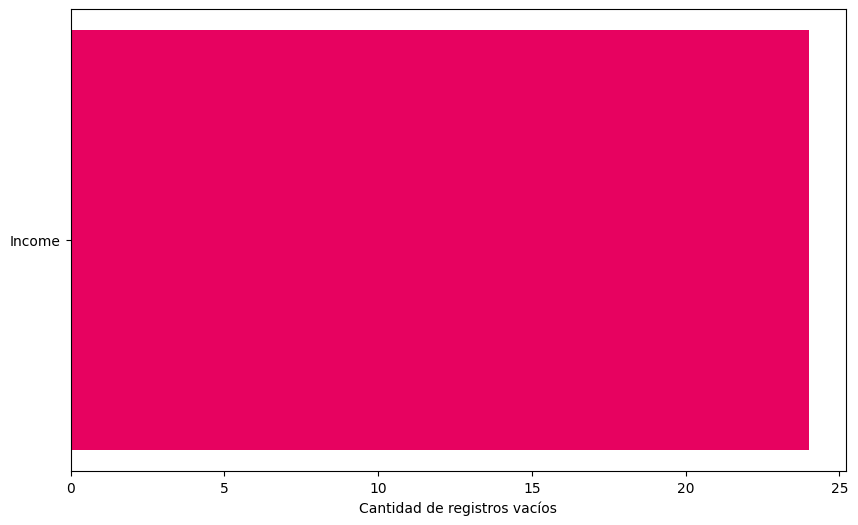

In [30]:
# Graficamente:
plt.figure(figsize=(10,6))
plt.barh(nulos_resumen.index,
         nulos_resumen['Cant_Nulos'],
         color = '#E70260')
plt.xlabel('Cantidad de registros vacíos')
plt.gca().invert_yaxis()
plt.show()

A continuacion, sacaremos los datos vacios de esta variable, para un mayor entendimiento de la misma y mejorar la precision y confiabilidad de los resultados.

In [31]:
#Quitamos los vacios de Income

df_1 = df.dropna()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [32]:
pd.DataFrame(df_1.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)


,Unique Values
Z_Revenue,1
Z_CostContact,1
Response,2
AcceptedCmp3,2
AcceptedCmp4,2
AcceptedCmp2,2
Complain,2
AcceptedCmp1,2
AcceptedCmp5,2
Kidhome,3


**Observacion: Las variables Z_Revenue  y Z_CostContact tienen valores constantes. No proporcionan ningun tipo de informacion, entonces las sacamos para poder ir teniendo cada vez variables mas signficativas.**

In [33]:
df_1.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# User ID y Regist Date no aportan informacion, la sacamos tambien
df_1.drop(['ID', 'Dt_Customer'], axis=1, inplace=True)

<ipython-input-33-55f04de7632b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
<ipython-input-33-55f04de7632b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(['ID', 'Dt_Customer'], axis=1, inplace=True)


**Transformamos la variable Year_Birth a Age, ya que Age nos proporiciona informacion mas precisa y mas relevante**

Aclaracion: hice la resta con 2021 debido a que la informacion del dataset corresponde a ese año.


In [34]:
df_1['Age'] = 2021 - df_1.Year_Birth.to_numpy()
df_1.drop('Year_Birth', axis=1, inplace=True)

<ipython-input-34-6d3c4c6da191>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Age'] = 2021 - df_1.Year_Birth.to_numpy()
<ipython-input-34-6d3c4c6da191>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop('Year_Birth', axis=1, inplace=True)


**Revisaremos la variable Marital_Status, para ver si todas las categorias nos dan informacion valiosa o no. Lo que vemos, es que Alone, Adsurd y YOLO son lo mismo que decir "Single", así que reemplazo todas esas variables con la categoria "Single" para simplificar el analisis del modelo posteriormente**

In [35]:
df_1['Marital_Status'].value_counts()


Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [36]:
df_1['Marital_Status'] = df_1['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

<ipython-input-36-962c0a3923cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Marital_Status'] = df_1['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')


#2. Analisis Exploratorio: En la siguiente seccion examinaremos la estructura del conjunto de datos, identificaremos patrones, tendencias, relaciones y posibles anomalías.

#Análisis Univariado de la Variable Target: Income.


**Revisaremos la variable Target para comprender la distribución de valores para esta variable en particular**.

Calcularemos medidas de tendencia central (como la media y la mediana) para comprender dónde se encuentra el centro de los datos.

También evaluamos medidas de dispersión (como el rango, el rango intercuartílico, la desviación estándar y la varianza) para entender cuán dispersos están los valores.

Promedio (Media): $52247.25
Mediana: $51381.50
Primer Cuartil (Q1): $35303.00
Tercer Cuartil (Q3): $68522.00


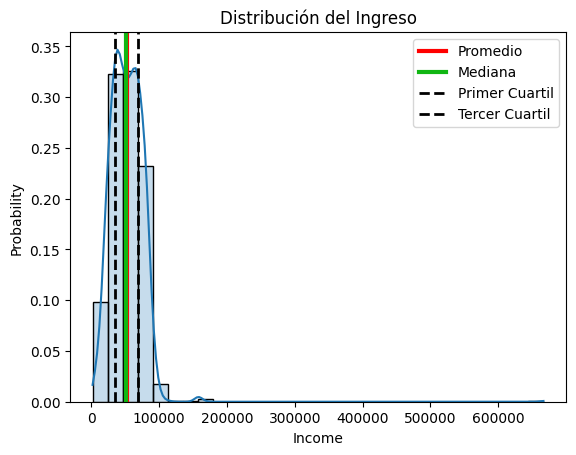

In [37]:
# Primero calculo algunas medidas que quiero presentar
media = df_1["Income"].mean()
mediana = df_1["Income"].median()
primer_cuartil = df_1["Income"].quantile(0.25)
tercer_cuartil = df_1["Income"].quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df_1,
             x = 'Income',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio
plt.axvline(x = media,
            color = 'red',
            linestyle = '-',
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana
plt.axvline(x = mediana,
            color = '#11B613',
            linestyle = '-',
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil
plt.axvline(x = primer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil
plt.axvline(x = tercer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución del Ingreso')


# Imprimo los valores
print(f"Promedio (Media): ${media:.2f}")
print(f"Mediana: ${mediana:.2f}")
print(f"Primer Cuartil (Q1): ${primer_cuartil:.2f}")
print(f"Tercer Cuartil (Q3): ${tercer_cuartil:.2f}")

**Observaciones: Se puede observar que la variable tiene:**

El promedio de ingresos es de $52,247.25. Esto significa que, en promedio, los valores de ingreso se encuentran alrededor de esta cifra.

La mediana de ingresos es de $51,381.50. La mediana es el valor que divide la muestra en dos partes iguales: el 50% de los ingresos están por encima de este valor y el otro 50% están por debajo.


El primer cuartil representa el 25% inferior de los datos. En este caso, el valor del primer cuartil es $35,303.00. Esto significa que el 25% de los ingresos son inferiores a esta cantidad.

El tercer cuartil representa el 25% superior de los datos.

El valor del tercer cuartil es $68,522.00. Esto indica que el 25% de los ingresos son superiores a esta cifra

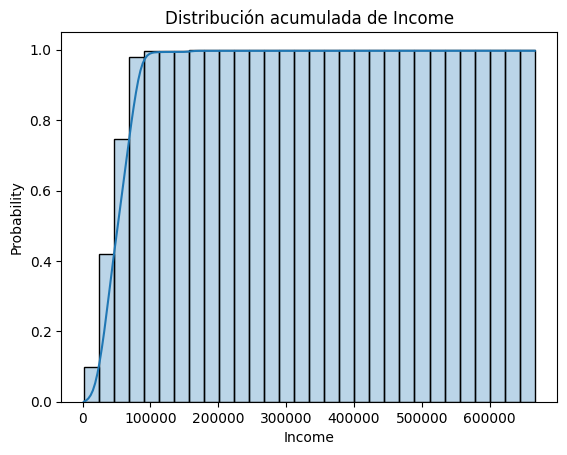

In [38]:
# Histograma con curva de densidad de frecuencias acumuladas
sns.histplot(df_1['Income'],
             kde = True,
             bins = 30,
             alpha = 0.3,
             stat = 'probability',
             cumulative = True)
plt.title('Distribución acumulada de Income')
plt.show()


**Observaciones: Se puede observar que la variable tiene una distribución asimétrica positiva (la mediana es menor que el promedio), concentrando gran porción de los registros en valores bajos, y observando muy pocos registros en valores altos.**



**Observaciones:Los outliers pueden afectar negativamente el rendimiento y la precisión de los modelos predictivos. Los modelos pueden ser sensibles a los outliers, especialmente en métodos basados en distancia o en supuestos de normalidad. Eliminar los outliers puede mejorar la precisión y la estabilidad del modelo.**


Text(0.5, 0, '')

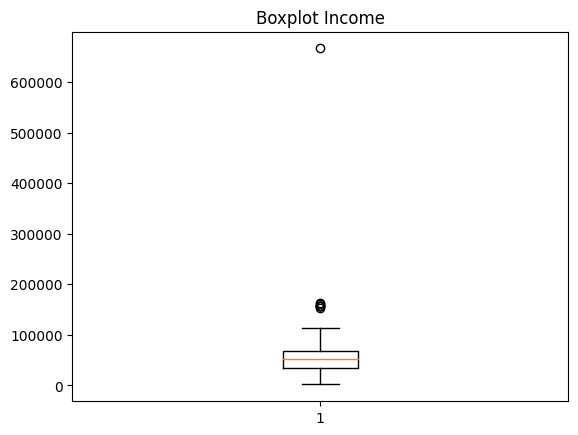

In [39]:
#Outilers.

fig, ax = plt.subplots()
ax.boxplot(df_1['Income'])
ax.set_title('Boxplot Income')
ax.set_xlabel('')


In [40]:
#Estos son los outilers que me marca.

Q1 = np.percentile(df_1['Income'], 25)
Q3 = np.percentile(df_1['Income'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = np.where((df_1["Income"]< lower_bound) | (df_1['Income'] > upper_bound))
outlier_indices


(array([ 153,  604,  642,  674, 1287, 1636, 2109, 2209]),)

In [41]:

df_1_1= df_1[(df_1["Income"] >= lower_bound) & (df_1["Income"] <= upper_bound)]
df_1_1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,64
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,67
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,56
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,37
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,4,5,0,0,0,0,0,0,0,54
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,5,7,0,0,0,1,0,0,0,75
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,13,6,0,1,0,0,0,0,0,40
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,10,3,0,0,0,0,0,0,0,65


In [42]:
#Chequiamos que efectivamente se fueron los outliers.

variable_target2 = df_1_1['Income']
len(variable_target2)

2208

**Observaciones: Efectivamente se fueron todos los outliers.**

Haremos otro histograma para ver si los valores mejoraron.

Text(0.5, 1.0, 'Distribución del Ingreso')

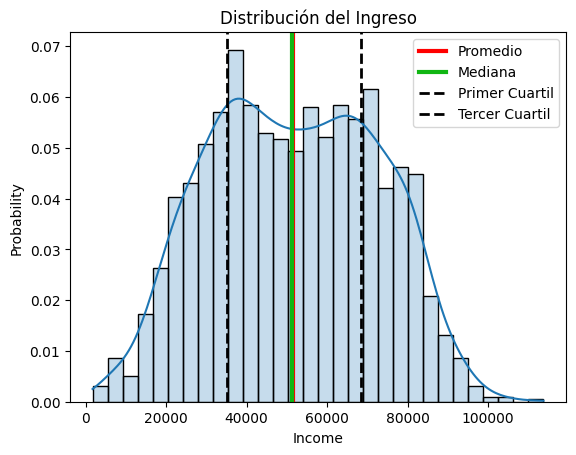

In [43]:
# Histograma variable target
# Primero calculo algunas medidas que quiero presentar
media = variable_target2.mean()
mediana = variable_target2.median()
primer_cuartil = variable_target2.quantile(0.25)
tercer_cuartil = variable_target2.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df_1_1,
             x = 'Income',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio
plt.axvline(x = media,
            color = 'red',
            linestyle = '-',
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana
plt.axvline(x = mediana,
            color = '#11B613',
            linestyle = '-',
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil
plt.axvline(x = primer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil
plt.axvline(x = tercer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución del Ingreso')

#Vemos como el grafico se encuentra mucho mas simetrico al que observamos anteriormente. Es asi, donde se puede comenzar a trabajar.

**Observaciones: Luego de las transformaciones, la variable esta mas asimetrica.**



In [44]:
# Creo una función para generar todas las medidas de interes
import scipy

def CalculaMetricas(variable):

    media = variable.mean()
    mediana = variable.median()
    media_recortada = scipy.stats.trim_mean(variable,0.1)
    varianza = variable.var()
    desvio = variable.std()
    primer_cuartil = variable.quantile(0.25)
    tercer_cuartil = variable.quantile(0.75)
    percentil_1 = variable.quantile(0.01)
    percentil_99 = variable.quantile(0.99)
    error_estandar = scipy.stats.sem(variable)
    cv = scipy.stats.variation(variable)
    asimetria = scipy.stats.skew(variable)
    curtosis = scipy.stats.kurtosis(variable)

    resultado = (
        f'Medidas de Tendencia Central\n'
        f'Media: {round(media, 0)}\n'
        f'Media Recortada: {round(media_recortada, 0)}\n'
        f'Mediana: {round(mediana, 0)}\n\n'
        f'Medidas de Localización\n'
        f'Primer Cuartil: {round(primer_cuartil, 0)}\n'
        f'Tercer Cuartil: {round(tercer_cuartil, 0)}\n'
        f'Percentil 1: {round(percentil_1, 0)}\n'
        f'Percentil 99: {round(percentil_99, 0)}\n\n'
        f'Medidas de Dispersión Absolutas\n'
        f'Varianza: {round(varianza, 0)}\n'
        f'Desvío Estándar: {round(desvio, 0)}\n'
        f'Rango Intercuartílico: {round(tercer_cuartil - primer_cuartil, 0)}\n'
        f'Error Estándar: {round(error_estandar, 0)}\n\n'
        f'Medidas de Dispersión Relativas\n'
        f'Coeficiente de Variación: {round(cv, 2)}\n'
        f'Desvío Intercuartílico: {round((tercer_cuartil - primer_cuartil) / (tercer_cuartil + primer_cuartil), 2)}\n\n'
        f'Medidas de Asimetría y Curtosis\n'
        f'Coeficiente de Asimetría: {round(asimetria, 2)}\n'
        f'Coeficiente de Curtosis: {round(curtosis, 2)}'
    )

    print(resultado)

CalculaMetricas(variable_target2)


Medidas de Tendencia Central
Media: 51634.0
Media Recortada: 51637.0
Mediana: 51301.0

Medidas de Localización
Primer Cuartil: 35196.0
Tercer Cuartil: 68290.0
Percentil 1: 7537.0
Percentil 99: 92838.0

Medidas de Dispersión Absolutas
Varianza: 429043967.0
Desvío Estándar: 20713.0
Rango Intercuartílico: 33094.0
Error Estándar: 441.0

Medidas de Dispersión Relativas
Coeficiente de Variación: 0.4
Desvío Intercuartílico: 0.32

Medidas de Asimetría y Curtosis
Coeficiente de Asimetría: 0.01
Coeficiente de Curtosis: -0.85


**Observaciones de la variable:**

1- La variable tiene mucha varianza.

2- Vemos que tiene un numero acorde de asimetrias.

3- Vemos que tiene un numero desacorde de Kurtosis.

Por ende, haremos una transformacion logaritmica a la variable objetivo para ver si mejoran los resultados.

Una transformación logarítmica es una operación que aplicamos a una variable para cambiar su escala y distribución. En particular, utilizamos el logaritmo natural (también conocido como ln o logₑ) en la mayoría de los casos.


In [45]:
df_1_1['Income_LOG'] = np.log(variable_target2)

variable_target2.describe()

<ipython-input-45-602d87d9ea4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_1['Income_LOG'] = np.log(variable_target2)


count      2208.000000
mean      51633.638134
std       20713.376530
min        1730.000000
25%       35196.000000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: Income, dtype: float64

In [46]:
CalculaMetricas(df_1_1['Income_LOG'])

Medidas de Tendencia Central
Media: 11.0
Media Recortada: 11.0
Mediana: 11.0

Medidas de Localización
Primer Cuartil: 10.0
Tercer Cuartil: 11.0
Percentil 1: 9.0
Percentil 99: 11.0

Medidas de Dispersión Absolutas
Varianza: 0.0
Desvío Estándar: 0.0
Rango Intercuartílico: 1.0
Error Estándar: 0.0

Medidas de Dispersión Relativas
Coeficiente de Variación: 0.05
Desvío Intercuartílico: 0.03

Medidas de Asimetría y Curtosis
Coeficiente de Asimetría: -1.31
Coeficiente de Curtosis: 3.02


**Observaciones:**

1- Vemos que la varianza mejora notablemente.

2- Vemos que la asimetria empora.

3- Vemos que la Kurtosis esta dentro de los parametros que esperamos.

Por ende, esta transformacion logaritmica mejoro los resultados.

#Análisis Univariado de la Variable EDAD.


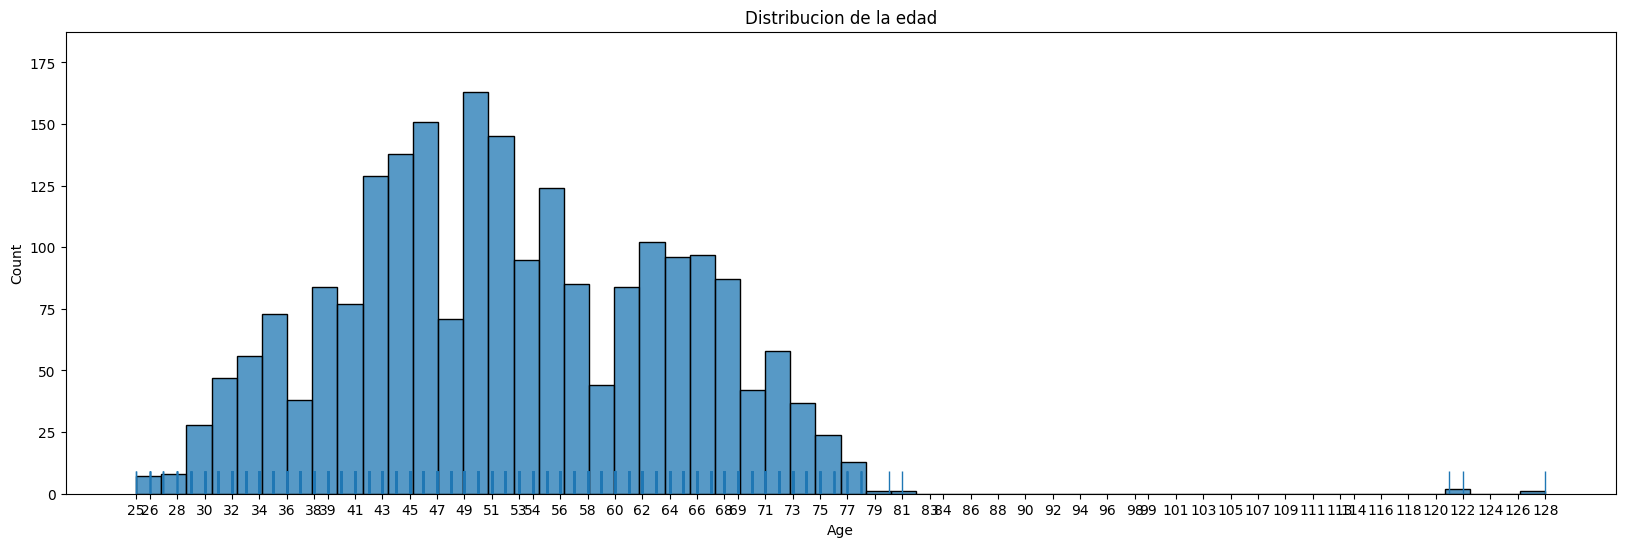

In [47]:
plt.figure(figsize=(20, 6))
plt.title('Distribucion de la edad')
ax = sns.histplot(df_1_1['Age'].sort_values(), bins=56)
sns.rugplot(data=df_1_1['Age'], height=.05)
plt.xticks(np.linspace(df_1_1['Age'].min(), df_1_1['Age'].max(), 56, dtype=int, endpoint = True))
plt.show()

**Observaciones:**

La edad de los clientes se concentra principalmente entre los 40 y 60 años, los jóvenes (menores de 30 años) son muy pocos.

#Análisis Univariado de la Variables KID HOME Y TEEN HOME.


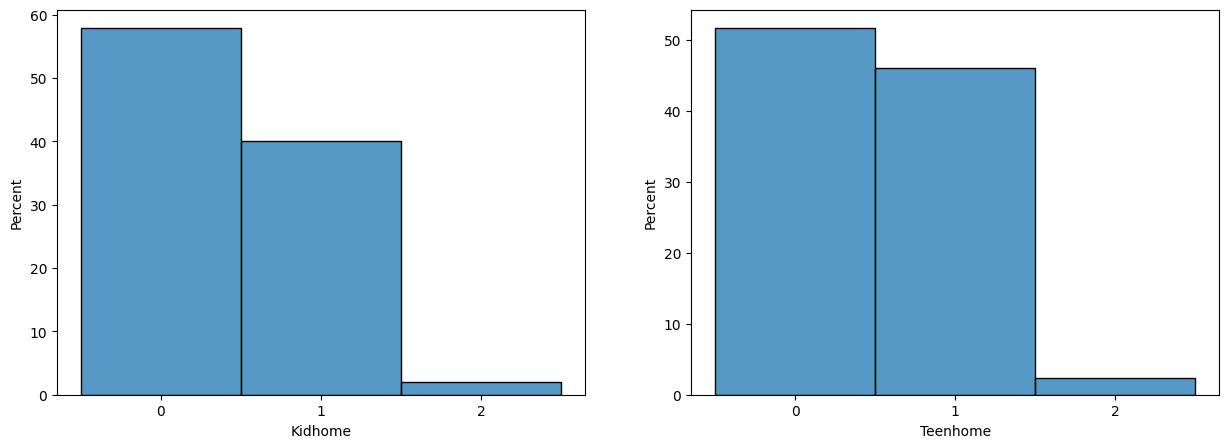

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=df_1_1, x='Kidhome', stat="percent", discrete=True)
plt.xticks([0, 1, 2])

plt.subplot(122)
sns.histplot(data=df_1_1, x='Teenhome', stat="percent",discrete=True)
plt.xticks([0, 1, 2])
plt.show()

**Observaciones:**

La gran mayoría de los clientes tienen 1 o 0 hijos en casa.

Muy pocos tienen 2 hijos y ninguno tiene hijos mayores de 2 años.

El numero de adolescentes en casa muestra una tendencia similar al número de niños.


#Análisis Multivariado de las variables EDAD, KID HOME, TEEN HOME Y RESPONDE con la variable target, el ingreso.



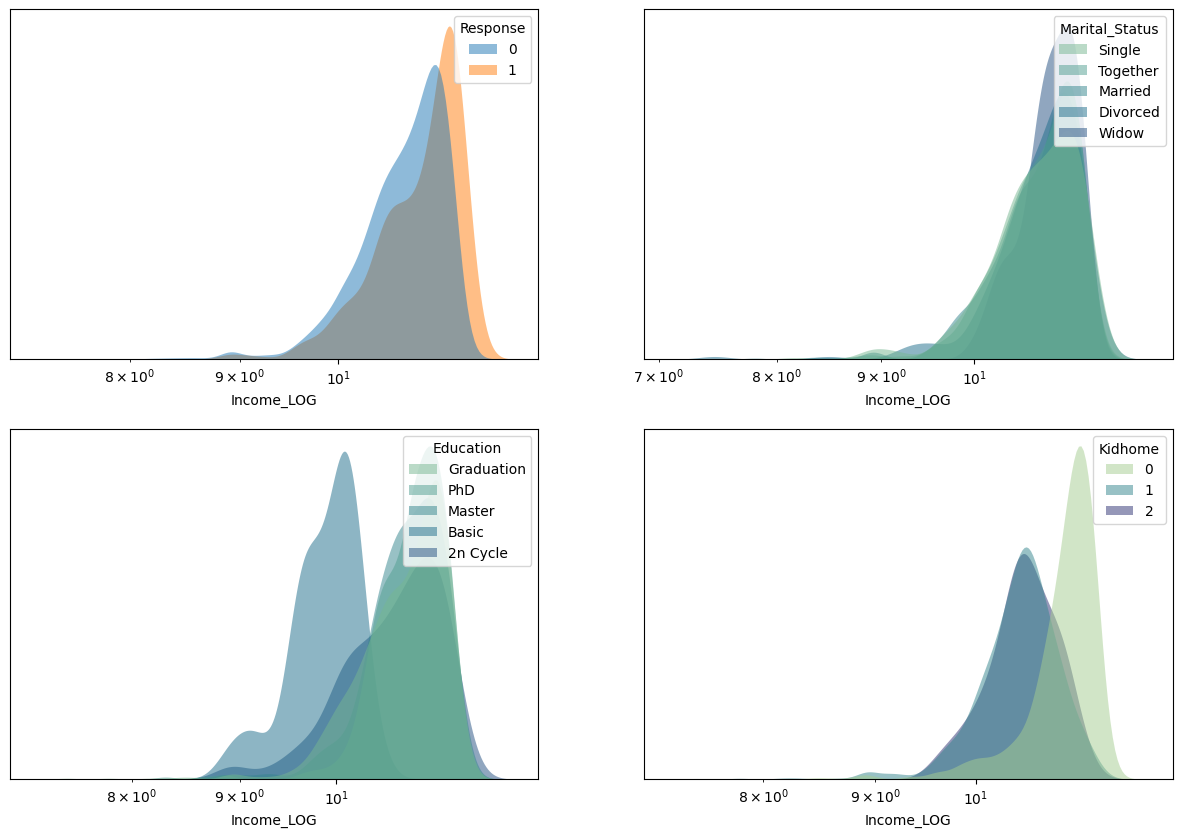

In [49]:
# Income
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.kdeplot(
   data=df_1_1, x="Income_LOG", hue="Response", log_scale= True,
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) # Set y invisible
plt.xlabel('Income_LOG')

#Marital_Status
plt.subplot(222)
sns.kdeplot(
   data=df_1_1, x="Income_LOG", hue="Marital_Status", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False)

 #Education
plt.subplot(223)
sns.kdeplot(
   data=df_1_1, x="Income_LOG", hue="Education", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False)

#Kidhome
plt.subplot(224)
sns.kdeplot(
   data=df_1_1, x="Income_LOG", hue="Kidhome", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False)

**Observaciones:**


1- Los individuos pertenecientes a grupos de altos ingresos muestran una mayor tendencia a aceptar la oferta de la campaña (aunque hay una leve diferencia)

2- No se observa una distinción marcada en los ingresos según el estado civil de las personas.

3- Se aprecia una disparidad significativa en los ingresos entre los clientes con educación básica en comparación con aquellos con títulos de licenciatura, maestría o doctorado, mientras que no se percibe una discrepancia evidente entre estos últimos grupos.

4- Los clientes que no tienen hijos en casa tienden a tener niveles de ingresos superiores.

#3. Ingenieria de datos: Vamos a crear nuevas variables y modificar las ya existentes, para lograr tener un dataset mas eficiente.

Las variables Kidhome y Teenhome son similares ya que ambas recuentas el numero de niños o adolecentes en el hogar. Entonces las combinaremos.


In [50]:
# Combinearemos 'Kidhome' y 'Teenhome' en 'Children'.
df_1_1['Children'] = df_1_1['Kidhome'] + df_1_1['Teenhome']

<ipython-input-50-cb29126beb70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_1['Children'] = df_1_1['Kidhome'] + df_1_1['Teenhome']


Para una mayor eficiencia del modelo, nos centraremos en reemplazar algunas variables relacionadas al estado amoroso/civil de cada clientes. Vamos a eliminar las otras categorias ( Widow,Divorced,YOLO,Absurd,Alone, Married,Together) y segmentarlas por si son solteros o tienen una relacion.


In [51]:
#nos importa si el cliente es soltero o tiene una relación
df_1_1['Marital_Status'] = df_1_1['Marital_Status'].replace(['Widow','Divorced',"YOLO","Absurd","Alone"],'Single')
df_1_1['Marital_Status'] = df_1_1['Marital_Status'].replace(['Married','Together'],'Relationship')
df_1_1.Marital_Status.value_counts()

<ipython-input-51-2c09f25238ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_1['Marital_Status'] = df_1_1['Marital_Status'].replace(['Widow','Divorced',"YOLO","Absurd","Alone"],'Single')
<ipython-input-51-2c09f25238ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_1['Marital_Status'] = df_1_1['Marital_Status'].replace(['Married','Together'],'Relationship')


Relationship    1423
Single           785
Name: Marital_Status, dtype: int64

No nos importa en qué campaña participa el cliente;nos importa por los tiempos totales de participación.


In [52]:
df_1_1['TotalAccepted'] = np.sum(df_1_1.filter(regex='Accepted'), axis=1)

<ipython-input-52-970a2193458c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_1['TotalAccepted'] = np.sum(df_1_1.filter(regex='Accepted'), axis=1)


Calculeremos el Promedio de compras por visita al sitio web, para tener un mayor acercamiento a su comportamiento.


In [53]:
df_1_1['AvgWeb'] = round(df_1_1['NumWebPurchases'] / df_1_1['NumWebVisitsMonth'], 2)
df_1_1.fillna({'AvgWeb' : 0},inplace=True) # Handling for cases where division by 0
df_1_1.replace(np.inf, 0, inplace=True)

<ipython-input-53-59d0ee3a3c4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_1['AvgWeb'] = round(df_1_1['NumWebPurchases'] / df_1_1['NumWebVisitsMonth'], 2)
<ipython-input-53-59d0ee3a3c4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_1.fillna({'AvgWeb' : 0},inplace=True) # Handling for cases where division by 0
<ipython-input-53-59d0ee3a3c4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

In [54]:
df_1_1['Education'].value_counts()

Graduation    1113
PhD            477
Master         364
2n Cycle       200
Basic           54
Name: Education, dtype: int64

El siguiente metodo reemplaza los valores '2n Cycle' por 'Master' y 'Graduation' por 'Bachelor' en la columna 'Education' del DataFrame df_1_1 para categorizar mejor la variable.

In [55]:
df_1_1['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)


<ipython-input-55-560f76b151da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_1['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)


In [56]:
df_1_1 = pd.get_dummies(df_1_1)
df_1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income                       2208 non-null   float64
 1   Kidhome                      2208 non-null   int64  
 2   Teenhome                     2208 non-null   int64  
 3   Recency                      2208 non-null   int64  
 4   MntWines                     2208 non-null   int64  
 5   MntFruits                    2208 non-null   int64  
 6   MntMeatProducts              2208 non-null   int64  
 7   MntFishProducts              2208 non-null   int64  
 8   MntSweetProducts             2208 non-null   int64  
 9   MntGoldProds                 2208 non-null   int64  
 10  NumDealsPurchases            2208 non-null   int64  
 11  NumWebPurchases              2208 non-null   int64  
 12  NumCatalogPurchases          2208 non-null   int64  
 13  NumStorePurchases 

#4. Feature Selection

En esta etapa de nuestro análisis, nos enfocaremos en identificar y seleccionar las variables que muestran una correlación significativa con nuestra variable objetivo: el ingreso (Income). La selección de características es un paso crítico en el proceso de modelado de datos, ya que nos permite centrar nuestros esfuerzos en las variables que tienen el mayor impacto en la variable que estamos tratando de predecir.




#Haremos una matriz de correlacion.

Esta proporcionara información sobre cómo las variables están relacionadas entre sí y es especialmente útil para comprender la estructura y la dependencia en los datos, par asi, realizar un mejor modelo predictivo.

In [57]:
# Calculo matriz de correlación
matriz_correlacion = df_1_1.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella
matriz_correlacion_target = matriz_correlacion['Income_LOG']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación
columnas_a_excluir = ['Income_LOG']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

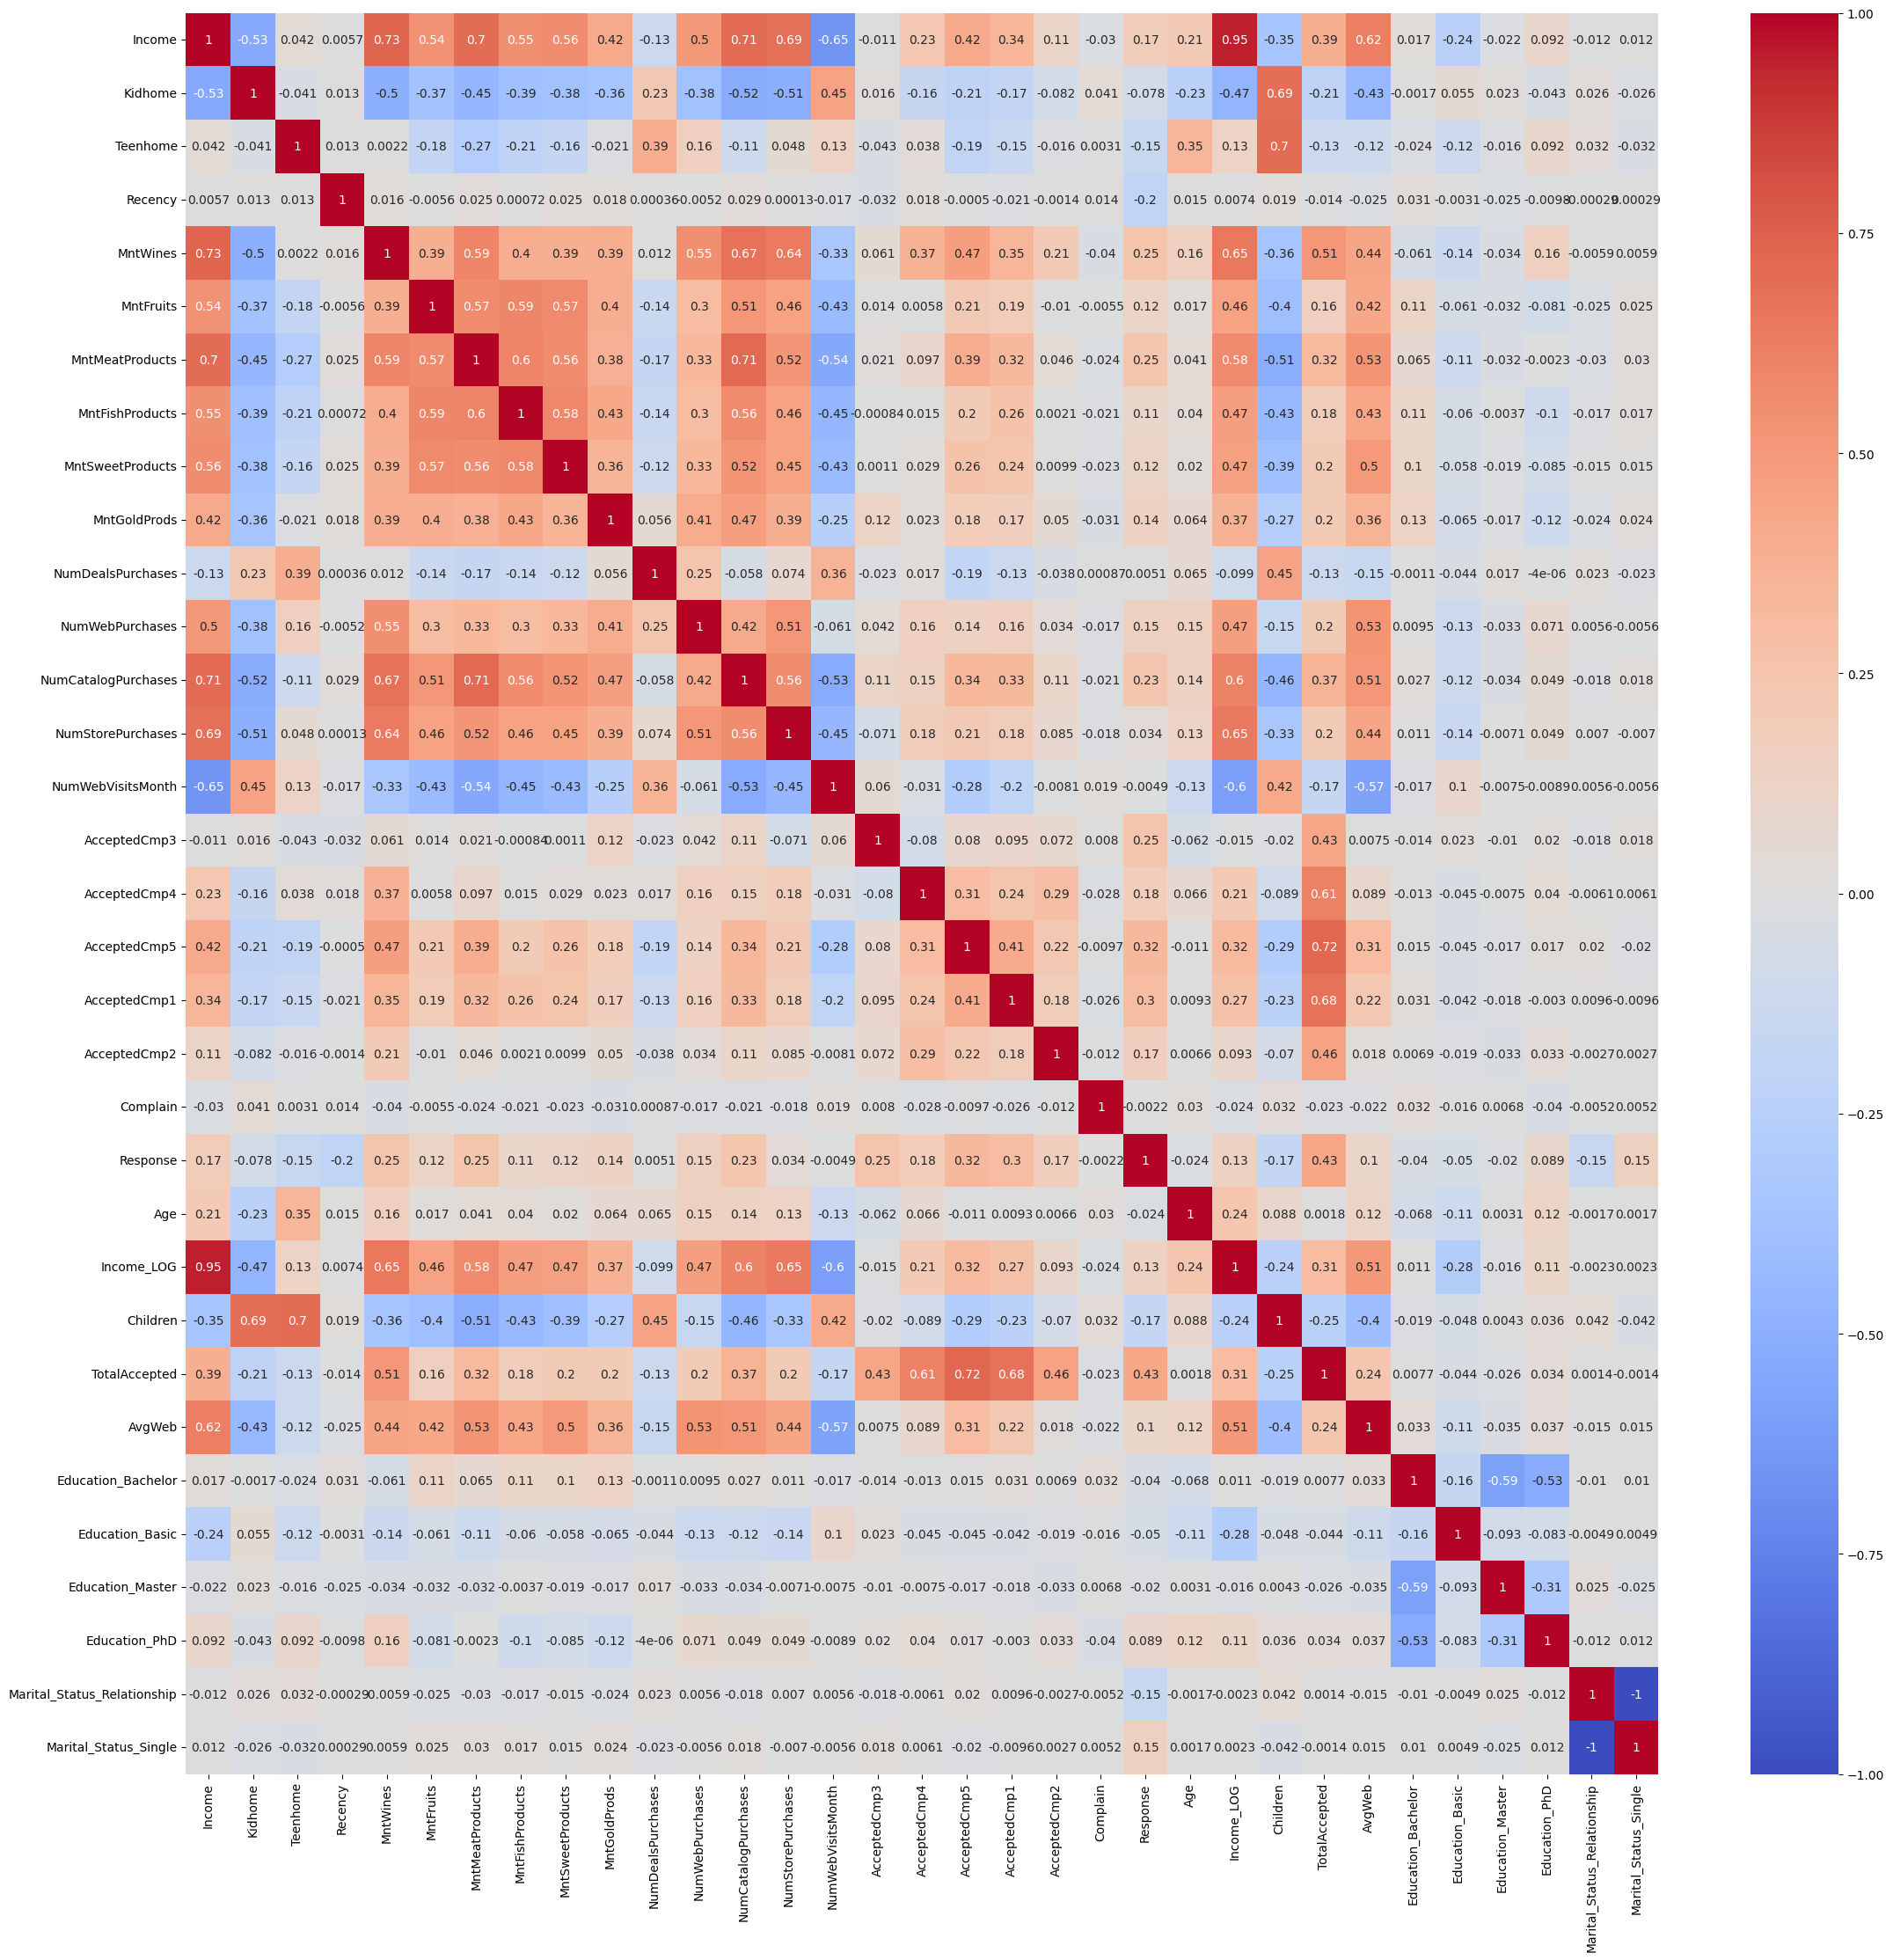

In [58]:
#Mapa de calor
cor = df_1_1.corr()
plt.figure(figsize = (27,26))
sns.heatmap(cor, annot = True, cmap = 'coolwarm')
plt.show()

**Observaciones:**

Aqui podemos ver a correlación entre diferentes variables en un conjunto de datos. Por ejemplo, podemos ver que las variables que contienen el monto invertido en en productos tienen una alta correlacion con el ingreso.

# Grafico el top 20 de variables más correlacionadas con la variable target, el ingreso.


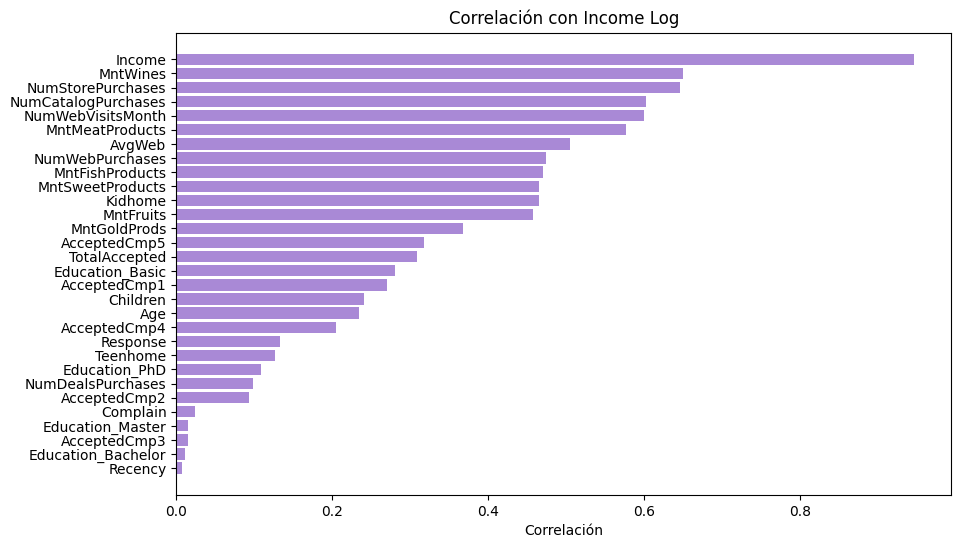

In [59]:
matriz_correlacion_target_graficar = matriz_correlacion_target[0:30]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index,
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con Income Log')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()



In [60]:
## Selecciona las 12 variables más importantes (para excluir 'Income')
top_12_variables = matriz_correlacion_target_graficar.index[:13]

# Si 'Income' está en las 12 variables más importantes, exclúyelo
if 'Income' in top_12_variables:
    top_12_variables = top_12_variables.drop('Income')
else:
    top_12_variables = top_12_variables[:12]

# Imprime las 12 variables más importantes
print("Las 12 variables más importantes son:")
for variable in top_12_variables:
    print(variable)

Las 12 variables más importantes son:
MntWines
NumStorePurchases
NumCatalogPurchases
NumWebVisitsMonth
MntMeatProducts
AvgWeb
NumWebPurchases
MntFishProducts
MntSweetProducts
Kidhome
MntFruits
MntGoldProds


**Observaciones:**

Luego de realizar el future selection, podemos ver cuales son las 12 variables que tienen mayor correlacion con el target.

Nos vamos a quedar con esas, para hacer el modelo de regresion.

Como podemos ver, las variables MntWines, NumStorePurchases, NumCatalogPurchases
NumWebVisitsMonth, MntMeatProducts, AvgWeb, NumWebPurchases, MntFishProducts, MntSweetProducts, MntFruits, MntGoldProds se encuentran relacionadas con los productos consumidos por los clientes. Por lo que, seran util para anhondar sobre la pregunta de investigacion 1.

In [61]:
df_modelo1 = df_1_1[["MntWines", "NumStorePurchases", "NumCatalogPurchases", "NumWebVisitsMonth", "MntMeatProducts", "AvgWeb", "NumWebPurchases", "MntFishProducts", "MntSweetProducts", "Kidhome", "MntFruits", "MntGoldProds", "Income_LOG"]]
df_modelo1

,MntWines,NumStorePurchases,NumCatalogPurchases,NumWebVisitsMonth,MntMeatProducts,AvgWeb,NumWebPurchases,MntFishProducts,MntSweetProducts,Kidhome,MntFruits,MntGoldProds,Income_LOG
0,635,4,10,7,546,1.14,8,172,88,0,88,88,10.970575
1,11,2,1,5,6,0.20,1,2,1,1,1,6,10.743847
2,426,10,2,4,127,2.00,8,111,21,0,49,42,11.179032
3,11,4,0,6,20,0.33,2,10,3,1,4,5,10.190394
4,173,6,3,5,118,1.00,5,46,27,1,43,15,10.973237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,709,4,3,5,182,1.80,9,42,118,0,43,247,11.022278
2236,406,5,2,7,30,1.14,8,0,0,2,0,8,11.066857
2237,908,13,3,6,217,0.33,2,32,12,0,48,24,10.950473
2238,428,10,5,3,214,2.00,6,80,30,0,30,61,11.145406


#Separamos al dataset en train y test.

En esta fase de nuestro análisis de datos, procedemos con la separación del conjunto de datos en dos subconjuntos distintos: uno para entrenar nuestro modelo y otro para evaluar su desempeño. Este proceso es esencial para validar la capacidad predictiva del modelo en datos no vistos y para evitar el sobreajuste al ajustar excesivamente el modelo a los datos de entrenamiento.

In [62]:
df_train,df_test = train_test_split(df_modelo1,
                                    test_size = 0.2, #Porcentaje de muestra test
                                    random_state = 43) #Semilla

In [63]:
# Check tasas similares
print('Income TRAIN:')
print(round(df_train["Income_LOG"].mean(),2))
print('Income TEST:')
print(round(df_test['Income_LOG'].mean(),2))

Income TRAIN:
10.76
Income TEST:
10.7


#A- PREGUNTA DE INVESTIGACION 1

Para responder a la pregunta de investigacion de si se puede estimar el ingreso de los consumidores basándose en sus patrones de consumo haremos dos principales modelos y luego compararemos sus metricas.

Estos modelos son de aprendizaje supervisado, en donde el modelo se entrena utilizando un conjunto de datos que contiene tanto las características de entrada como las correspondientes etiquetas o valores de salida.


#Modelo 1: regresion lineal.


El modelo de regresión lineal es una técnica estadística que se utiliza para modelar la relación entre una o más variables independientes (predictoras) y una variable dependiente (objetivo) continua. El objetivo principal del modelo de regresión lineal es predecir el valor de la variable dependiente en función de los valores de las variables independientes.

En este caso, la variable dependiente es el Income, el ingreso de los consumidores. Mientras que las variables independientes son las 12 variables que quedaron seleccionadas anteriorimente relacionadas al consumo de los clientes.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, median_absolute_error, max_error, mean_squared_error, r2_score

# Separar los datos en conjuntos de entrenamiento y prueba
X = df_modelo1[["MntWines", "NumStorePurchases", "NumCatalogPurchases", "NumWebVisitsMonth", "MntMeatProducts", "AvgWeb", "NumWebPurchases", "MntFishProducts", "MntSweetProducts", "Kidhome", "MntFruits", "MntGoldProds"]]
y = df_modelo1['Income_LOG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
lm1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Predecir sobre los conjuntos de entrenamiento y prueba
y_pred_train = lm1.predict(sm.add_constant(X_train))
y_pred_test = lm1.predict(sm.add_constant(X_test))


# Calcular las métricas para el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
max_err_test = max_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir las métricas
print("\nMétricas para conjunto de prueba:")
print(f"Mean Absolute Error: {mae_test}")
print(f"Median Absolute Error: {medae_test}")
print(f"Max Error: {max_err_test}")
print(f"Error Cuadrático Medio: {mse_test}")
print(f"R2: {r2_test}")


# Calcular las métricas para el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_pred_train)
medae_train = median_absolute_error(y_train, y_pred_train)
max_err_train = max_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Imprimir las métricas
print("\nMétricas para conjunto de entrenamiento:")
print(f"Mean Absolute Error: {mae_train}")
print(f"Median Absolute Error: {medae_train}")
print(f"Max Error: {max_err_train}")
print(f"Error Cuadrático Medio: {mse_train}")
print(f"R2: {r2_train}")


Métricas para conjunto de prueba:
Mean Absolute Error: 0.20872432499792556
Median Absolute Error: 0.15517350133928876
Max Error: 3.4306953452694415
Error Cuadrático Medio: 0.10308423048435741
R2: 0.6024785008106759

Métricas para conjunto de entrenamiento:
Mean Absolute Error: 0.19466297440013325
Median Absolute Error: 0.14087045133722143
Max Error: 2.9106807728134196
Error Cuadrático Medio: 0.08382285176509147
R2: 0.6594770952959497



**Observaciones:**

**Mean Absolute Error (MAE):**

Este valor (0.2087) indica que, en promedio, las predicciones del modelo están desviadas en 0.2087 unidades del valor real. El MAE es una medida absoluta de la magnitud promedio de los errores en las predicciones. Un MAE más bajo indica una mayor precisión del modelo.

**Median Absolute Error:**

Este valor (0.1552) representa la mediana de los errores absolutos de todas las predicciones. Al igual que el MAE, es una medida de la magnitud promedio de los errores, pero menos sensible a los valores atípicos en comparación con el MAE.

**Max Error:**

El valor máximo del error (3.4307) indica el mayor error absoluto cometido por el modelo en una sola predicción. Este valor puede ser útil para identificar casos extremos en los que el modelo se desempeña peor.

**Error Cuadrático Medio (MSE):**

Este valor (0.1031) representa el promedio de los cuadrados de los errores entre las predicciones del modelo y los valores reales. El MSE penaliza más fuertemente los errores grandes que el MAE. Un MSE más bajo indica una mejor precisión del modelo.

**R2 (Coeficiente de determinación):**

Este valor (0.6025) indica la proporción de la varianza total de la variable dependiente que es explicada por el modelo. Un R2 más cercano a 1 indica que el modelo explica una mayor parte de la variabilidad de los datos y, por lo tanto, se considera mejor.

#Validacion cruzada

La validación cruzada es una técnica fundamental en ciencia de datos y aprendizaje automático. Su objetivo es evaluar la variabilidad y confiabilidad de los modelos. Después de entrenar un modelo con datos etiquetados, es crucial verificar su desempeño con nuevos datos. La validación cruzada nos permite lograr esto de manera efectiva.

In [65]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, median_absolute_error, max_error, mean_squared_error, r2_score
import numpy as np

# Número de pliegues para la validación cruzada
n_splits = 5

# Configurar K-fold Cross-Validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar las métricas de rendimiento en cada pliegue
mae_train_list = []
mae_test_list = []
medae_train_list = []
medae_test_list = []
max_err_train_list = []
max_err_test_list = []
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []

# Realizar validación cruzada
for fold_idx, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Entrenar el modelo en el conjunto de entrenamiento del fold actual
    lm = sm.OLS(y_train_fold, sm.add_constant(X_train_fold)).fit()

    # Predecir sobre los conjuntos de entrenamiento y prueba del fold actual
    y_pred_train_fold = lm.predict(sm.add_constant(X_train_fold))
    y_pred_test_fold = lm.predict(sm.add_constant(X_test_fold))

    # Calcular las métricas de rendimiento
    mae_train = mean_absolute_error(y_train_fold, y_pred_train_fold)
    mae_test = mean_absolute_error(y_test_fold, y_pred_test_fold)
    medae_train = median_absolute_error(y_train_fold, y_pred_train_fold)
    medae_test = median_absolute_error(y_test_fold, y_pred_test_fold)
    max_err_train = max_error(y_train_fold, y_pred_train_fold)
    max_err_test = max_error(y_test_fold, y_pred_test_fold)
    mse_train = mean_squared_error(y_train_fold, y_pred_train_fold)
    mse_test = mean_squared_error(y_test_fold, y_pred_test_fold)
    r2_train = r2_score(y_train_fold, y_pred_train_fold)
    r2_test = r2_score(y_test_fold, y_pred_test_fold)

    # Almacenar las métricas de rendimiento en las listas
    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)
    medae_train_list.append(medae_train)
    medae_test_list.append(medae_test)
    max_err_train_list.append(max_err_train)
    max_err_test_list.append(max_err_test)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

    # Imprimir las métricas del fold actual
    print(f"Fold {fold_idx}:")
    print(f"Mean Absolute Error (Train): {mae_train}")
    print(f"Mean Absolute Error (Test): {mae_test}")
    print(f"Median Absolute Error (Train): {medae_train}")
    print(f"Median Absolute Error (Test): {medae_test}")
    print(f"Max Error (Train): {max_err_train}")
    print(f"Max Error (Test): {max_err_test}")
    print(f"Mean Squared Error (Train): {mse_train}")
    print(f"Mean Squared Error (Test): {mse_test}")
    print(f"R2 Score (Train): {r2_train}")
    print(f"R2 Score (Test): {r2_test}")
    print("-" * 50)

# Calcular las métricas promedio de rendimiento
mae_train_avg = np.mean(mae_train_list)
mae_test_avg = np.mean(mae_test_list)
medae_train_avg = np.mean(medae_train_list)
medae_test_avg = np.mean(medae_test_list)
max_err_train_avg = np.mean(max_err_train_list)
max_err_test_avg = np.mean(max_err_test_list)
mse_train_avg = np.mean(mse_train_list)
mse_test_avg = np.mean(mse_test_list)
r2_train_avg = np.mean(r2_train_list)
r2_test_avg = np.mean(r2_test_list)

# Imprimir las métricas promedio de rendimiento
print("Métricas promedio de rendimiento:")
print(f"Mean Absolute Error (Train): {mae_train_avg}")
print(f"Mean Absolute Error (Test): {mae_test_avg}")
print(f"Median Absolute Error (Train): {medae_train_avg}")
print(f"Median Absolute Error (Test): {medae_test_avg}")
print(f"Max Error (Train): {max_err_train_avg}")
print(f"Max Error (Test): {max_err_test_avg}")
print(f"Mean Squared Error (Train): {mse_train_avg}")
print(f"Mean Squared Error (Test): {mse_test_avg}")
print(f"R2 Score (Train): {r2_train_avg}")
print(f"R2 Score (Test): {r2_test_avg}")

Fold 1:
Mean Absolute Error (Train): 0.1946629744001401
Mean Absolute Error (Test): 0.20872432499793214
Median Absolute Error (Train): 0.1408704513370731
Median Absolute Error (Test): 0.1551735013392479
Max Error (Train): 2.9106807728133166
Max Error (Test): 3.430695345269294
Mean Squared Error (Train): 0.08382285176509144
Mean Squared Error (Test): 0.10308423048435558
R2 Score (Train): 0.6594770952959499
R2 Score (Test): 0.6024785008106829
--------------------------------------------------
Fold 2:
Mean Absolute Error (Train): 0.19210687896568704
Mean Absolute Error (Test): 0.21217460166521263
Median Absolute Error (Train): 0.1453957362317322
Median Absolute Error (Test): 0.13640664043902984
Max Error (Train): 1.9899310370395007
Max Error (Test): 3.5161667227502322
Mean Squared Error (Train): 0.07301003952709036
Mean Squared Error (Test): 0.14362696277691153
R2 Score (Train): 0.6881166687952529
R2 Score (Test): 0.5315429154118261
--------------------------------------------------
Fold 

Tomemos el promedio de las metricas de la validacion cruzada como referente para comparar con la validacion simple.


**Observaciones:**

Se observa que los numeros de las metricas dan resultados similares al metodo de validacion simple, por lo que se puede concluir que la validacion cruzada esta validado el modelo correctamente.

#PCA

Usaremos esta tecnica paara reducir la dimensionalidad que se utiliza para simplificar conjuntos de datos complejos al transformar las variables originales en un nuevo conjunto de variables.

In [66]:
# Aplicacion de PCA
from sklearn.decomposition import PCA
# Inicio el objeto PCA
pca = PCA()
# Genero componentes con TRAIN
PCA_train = pca.fit_transform(df_train)
# Aplico a test
PCA_test = pca.transform(df_test)

# Almaceno en dataframe y presento
# Train
PCA_train = pd.DataFrame(data = PCA_train)
prefijo = "PC_"
PCA_train = PCA_train.add_prefix(prefijo)
# Test
PCA_test = pd.DataFrame(data = PCA_test)
prefijo = "PC_"
PCA_test = PCA_test.add_prefix(prefijo)
# ¿Qué generé?
PCA_train.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12
0,-290.615858,6.847182,27.571512,-7.055190,-2.626080,-0.548678,0.291282,1.638618,-1.131964,-0.271667,0.320594,-0.158258,0.279260
1,-6.137940,-133.290407,-18.665147,56.206170,-5.926145,-3.019056,-0.908494,2.007373,0.449745,0.386349,-0.161690,-0.571445,-0.154295
2,-348.769966,2.188439,5.715036,-14.252873,4.536369,-11.419098,2.542875,1.622176,-0.374727,-1.442716,0.474914,0.868645,-0.469743
3,397.312258,-216.516107,-70.705069,-64.114175,76.342355,-88.232767,-0.579394,-1.177677,2.696495,-2.813030,-0.172708,-0.139498,-0.213790
4,-284.459090,-12.772098,12.243243,-5.279705,-9.607746,0.385117,-0.147140,-2.115943,0.505593,0.875460,-0.467975,-0.445038,-0.240208


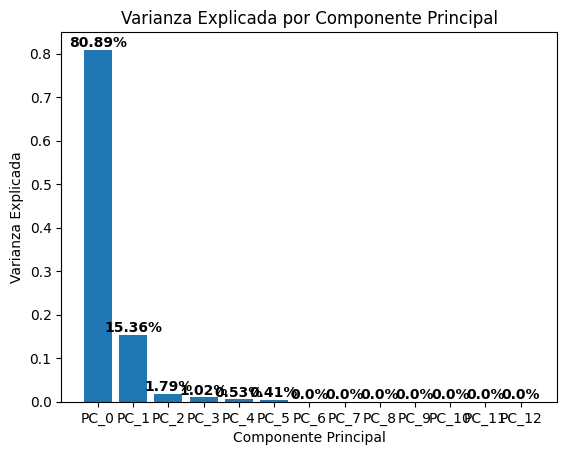

In [67]:
# Análisis de la varianza explicada para cada componente
varianza_explicada = pca.explained_variance_ratio_
componentes = PCA_train.columns

plt.bar(componentes,
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(y_text * 100,2))}%', # Indica posición x e y, y texto a mostrar
            ha = 'center', # Alineación horizontal
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

**Insights**:

El primer componente principal es responsable de la varianza del 80,9%. De manera similar, el segundo componente principal causa una variación del 15,36% en el conjunto de datos. En conjunto, podemos decir que el 96,26% de la información del conjunto de características es capturada por los dos primeros componentes principales.

In [68]:
gastos = ["MntWines", "NumStorePurchases", "NumCatalogPurchases", "NumWebVisitsMonth", "MntMeatProducts", "AvgWeb", "NumWebPurchases", "MntFishProducts", "MntSweetProducts", "Kidhome", "MntFruits", "MntGoldProds"]

In [69]:
# Uno todo a los dataframes originales
df_train = pd.concat([df_train,PCA_train],axis = 1)
df_test = pd.concat([df_test,PCA_test],axis = 1)

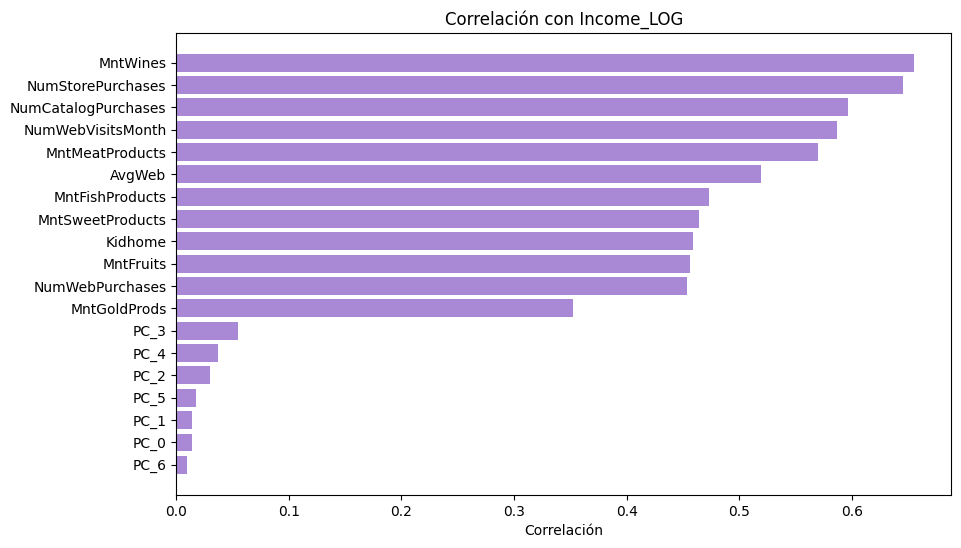

In [70]:
# Correlación con el target
variables_PCA = ['PC_0','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Income_LOG']
variables_final = gastos + variables_PCA
# Calculo matriz de correlación
matriz_correlacion = df_train[variables_final].corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella
matriz_correlacion_target = matriz_correlacion['Income_LOG']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación
columnas_a_excluir = ['Income_LOG']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index,
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con Income_LOG')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

In [71]:
#primero verifico los resultados de cada componente para relevar si los datos estan correctos.
print(matriz_correlacion_target)

MntWines               0.655416
NumStorePurchases      0.645681
NumCatalogPurchases    0.596666
NumWebVisitsMonth      0.587020
MntMeatProducts        0.570224
AvgWeb                 0.519404
MntFishProducts        0.472876
MntSweetProducts       0.464600
Kidhome                0.458972
MntFruits              0.456399
NumWebPurchases        0.453960
MntGoldProds           0.352287
PC_3                   0.054958
PC_4                   0.037262
PC_2                   0.029691
PC_5                   0.017729
PC_1                   0.014319
PC_0                   0.013652
PC_6                   0.009189
Name: Income_LOG, dtype: float64


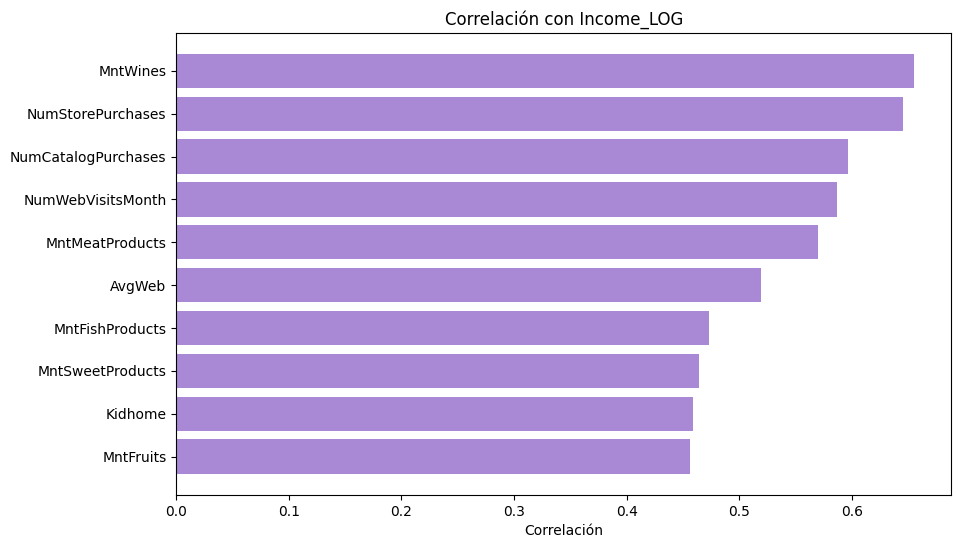

In [72]:
import matplotlib.pyplot as plt

# Los datos de correlación
correlations = pd.Series({
    'MntWines': 0.655416,
    'NumStorePurchases': 0.645681,
    'NumCatalogPurchases': 0.596666,
    'NumWebVisitsMonth': 0.587020,
    'MntMeatProducts': 0.570224,
    'AvgWeb': 0.519404,
    'MntFishProducts': 0.472876,
    'MntSweetProducts': 0.464600,
    'Kidhome': 0.458972,
    'MntFruits': 0.456399,
    'NumWebPurchases': 0.453960,
    'MntGoldProds': 0.352287,
    'PC_3': 0.054958,
    'PC_4': 0.037262,
    'PC_2': 0.029691,
    'PC_5': 0.017729,
    'PC_1': 0.014319,
    'PC_0': 0.013652,
    'PC_6': 0.009189
})

# Ordenamos de mayor a menor correlación
sorted_correlations = correlations.sort_values(ascending=False)

# Graficar las primeras N observaciones (por ejemplo, las primeras 10)
top_N = 10
plt.figure(figsize=(10, 6))
plt.barh(sorted_correlations.index[:top_N], sorted_correlations.values[:top_N], color='#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con Income_LOG')
plt.gca().invert_yaxis()
plt.show()


**Observaciones:**

Vemos que ninguno de los PCA entra dento del ranking de las 10 variables mas correlacionadas con el target.

Por ende, nos seguimos quedando con estas variables anteriores y nuestro modelo final queda como el inicial que planteamos luego de todas las extracciones y modificaciones de variables.

#Modelo 2: Regresión de Árboles de Decisión:

Este algoritmo de regresión divide iterativamente el espacio de características en subconjuntos cada vez más pequeños, utilizando decisiones basadas en las características de los datos.

Utilizaremos este modelo, para compararlo con el modelo de regresion lineal 1, y luego verificar cual es mejor para predecir y estimar el ingreso en base a los consumidores.

In [73]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
tree_reg.fit(X_train, y_train)

# Predecir sobre los conjuntos de entrenamiento y prueba
y_pred_train_tree = tree_reg.predict(X_train)
y_pred_test_tree = tree_reg.predict(X_test)

# Calcular las métricas para el conjunto de prueba
mae_test_tree = mean_absolute_error(y_test, y_pred_test_tree)
medae_test_tree = median_absolute_error(y_test, y_pred_test_tree)
max_err_test_tree = max_error(y_test, y_pred_test_tree)
mse_test_tree = mean_squared_error(y_test, y_pred_test_tree)
r2_test_tree = r2_score(y_test, y_pred_test_tree)

# Imprimir las métricas
print("\nMétricas para conjunto de prueba (Regresión de Árboles de Decisión):")
print(f"Mean Absolute Error: {mae_test_tree}")
print(f"Median Absolute Error: {medae_test_tree}")
print(f"Max Error: {max_err_test_tree}")
print(f"Error Cuadrático Medio: {mse_test_tree}")
print(f"R2: {r2_test_tree}")



Métricas para conjunto de prueba (Regresión de Árboles de Decisión):
Mean Absolute Error: 0.1705851598726519
Median Absolute Error: 0.10379218290623271
Max Error: 1.6262556973602589
Error Cuadrático Medio: 0.07374820810611873
R2: 0.7156063724672297


**Observaciones:**


**Mean Absolute Error (MAE):**

El MAE es 0.1706, lo que indica que, en promedio, las predicciones del modelo están desviadas en 0.1706 unidades del valor real del ingreso.
Un MAE más bajo indica una mejor precisión del modelo.

**Median Absolute Error:**

La Mediana del Error Absoluto (Median Absolute Error) es 0.1038, lo que significa que la mediana de los errores absolutos de todas las predicciones es 0.1038 unidades.
Esta métrica proporciona una medida de la magnitud promedio de los errores, pero es menos sensible a los valores atípicos que el MAE.

**Max Error:**

El error máximo es 1.6263, lo que indica el mayor error absoluto cometido por el modelo en una sola predicción.
Este valor puede ser útil para identificar casos extremos en los que el modelo se desempeña peor.

**Error Cuadrático Medio (MSE):**

El MSE es 0.0737, lo que representa el promedio de los cuadrados de los errores entre las predicciones del modelo y los valores reales del ingreso.
Un MSE más bajo indica una mejor precisión del modelo.


**R2 (Coeficiente de determinación):**

El coeficiente de determinación (R2) es 0.7156, lo que indica que el modelo explica aproximadamente el 71.56% de la variabilidad en los datos.
Un R2 más cercano a 1 indica que el modelo es capaz de explicar una mayor proporción de la variabilidad de los datos, y por lo tanto se considera mejor.

#Comparando los modelos

**Mean Absolute Error (MAE):**

El MAE del Modelo 2 es menor que el del Modelo 1, lo que indica que el Modelo 2 tiene una menor discrepancia promedio entre las predicciones y los valores reales en el conjunto de prueba.

**Median Absolute Error:**

El Modelo 2 también tiene una mediana del error absoluto más baja, lo que sugiere que el Modelo 2 es más consistente en términos de precisión.

**Max Error:**

El Modelo 2 tiene un error máximo significativamente menor que el Modelo 1, lo que indica que el Modelo 2 tiene menos valores atípicos extremos en sus predicciones.

**Error Cuadrático Medio (MSE):**

El MSE del Modelo 2 es menor que el del Modelo 1, lo que indica que el Modelo 2 tiene una mejor precisión en general al predecir los valores de ingresos.

**R2 (Coeficiente de determinación):**

El R2 del Modelo 2 es más alto que el del Modelo 1, lo que sugiere que el Modelo 2 explica una mayor proporción de la variabilidad en los datos de ingresos.







**Conclusion final**: Basándonos en estas comparaciones, podemos concluir que el Modelo 2, que es la Regresión de Árboles de Decisión, parece ser mejor en términos de precisión y capacidad predictiva en comparación con el Modelo 1, que es la Regresión Lineal. Por lo tanto, podríamos preferir el Modelo 2 para predecir los ingresos de los consumidores.


#B- PREGUNTA DE INVESTIGACION 2

Para indigar sobre la personalidad del consumidor, haciendo una segmentación de clientes, utilizaremos dos modelos para luego comparar sus metricas.

Estos modelos forman parte del  aprendizaje no supervisado, en donde se entrena en datos que no tienen etiquetas o valores objetivo asociados. En lugar de predecir una variable de salida específica, el objetivo principal del aprendizaje no supervisado es descubrir patrones o estructuras subyacentes en los datos.


#Modelo 1: K-Nearest Neighbors (K-NN)

Este algortimo clasifica las muestras según la clase de sus vecinos más
cercanos en el espacio de características

In [74]:
# Agregue 'MntTotal': el monto total de compra de todos los productos
df_1_1['MntTotal'] = np.sum(df_1_1.filter(regex='Mnt'), axis=1)

In [75]:
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

cluster_data = df_1_1.values

std_scale = preprocessing.StandardScaler().fit(cluster_data)
cluster_data = std_scale.transform(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

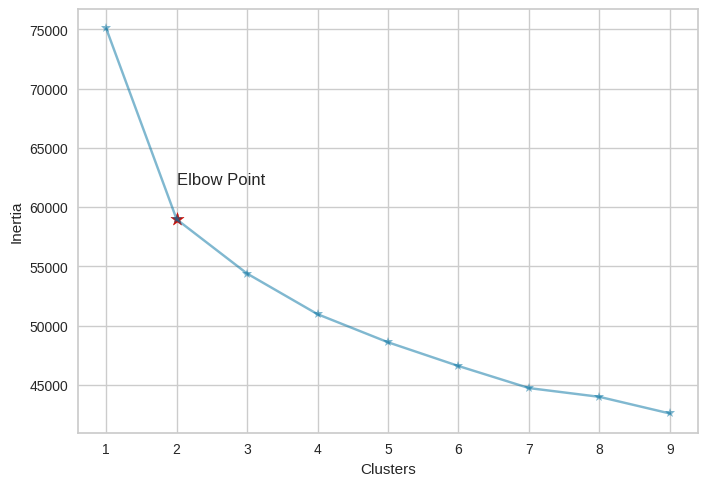

In [76]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(cluster_data)
    inertia.append(kmeans.inertia_)

elbow = 2
plt.plot(range(1, 10), inertia, marker = '*', alpha=0.5)
plt.scatter(elbow, inertia[elbow-1], s=100, c='r', marker='*')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.annotate('Elbow Point' ,(elbow, inertia[elbow-1]), xytext=(elbow,inertia[elbow-1] + 3000))
plt.show()

**Observaciones:**


El "codo" (elbow) en el método de K-means es un concepto utilizado para determinar el número óptimo de clusters en un conjunto de datos. En este contexto, "codo" se refiere a un punto en el gráfico de la suma de las distancias cuadradas intra-cluster en función del número de clusters (k) donde se observa una desaceleración significativa en la tasa de decrecimiento de la suma de las distancias cuadradas intra-cluster.

En este caso, el k elegido es 2. Aqui es el punto donde la adición de más clusters no proporciona un beneficio significativo en términos de cohesión.



In [77]:
kmeans = KMeans(n_clusters=2, init = 'k-means++').fit(cluster_data)
pred = kmeans.predict(cluster_data)
df_1_1['Cluster'] = pred + 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


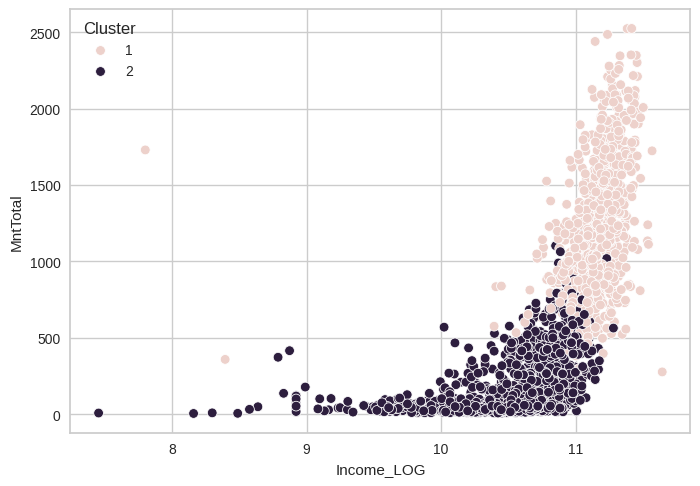

In [78]:
sns.scatterplot(x='Income_LOG',y='MntTotal',hue='Cluster',data=df_1_1)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


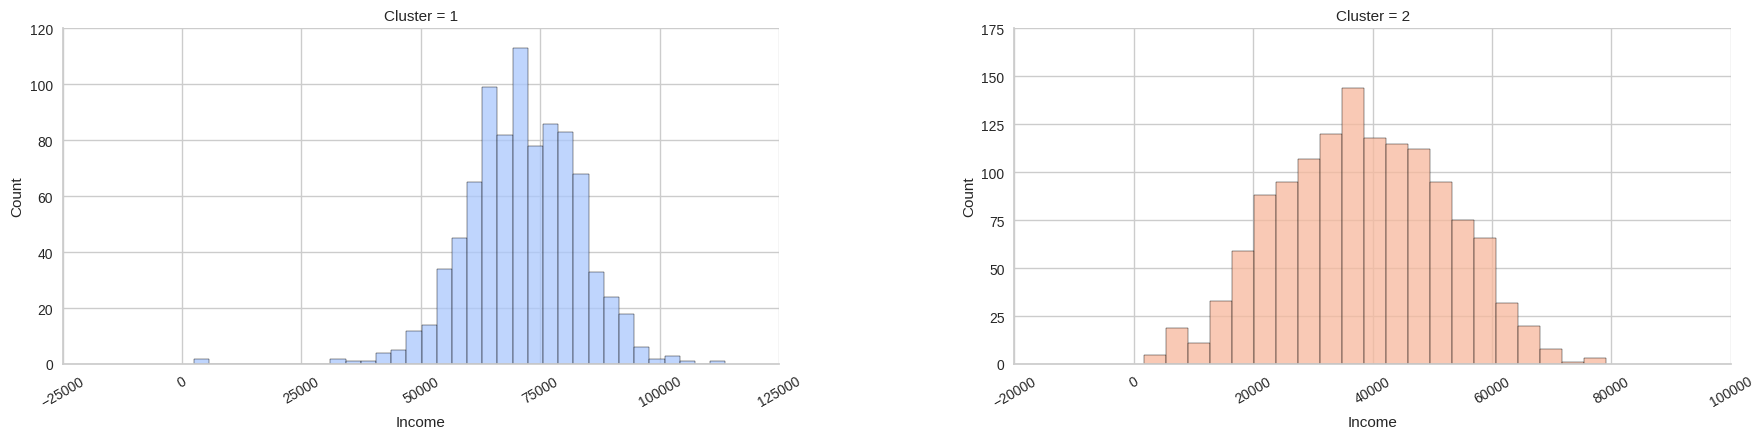

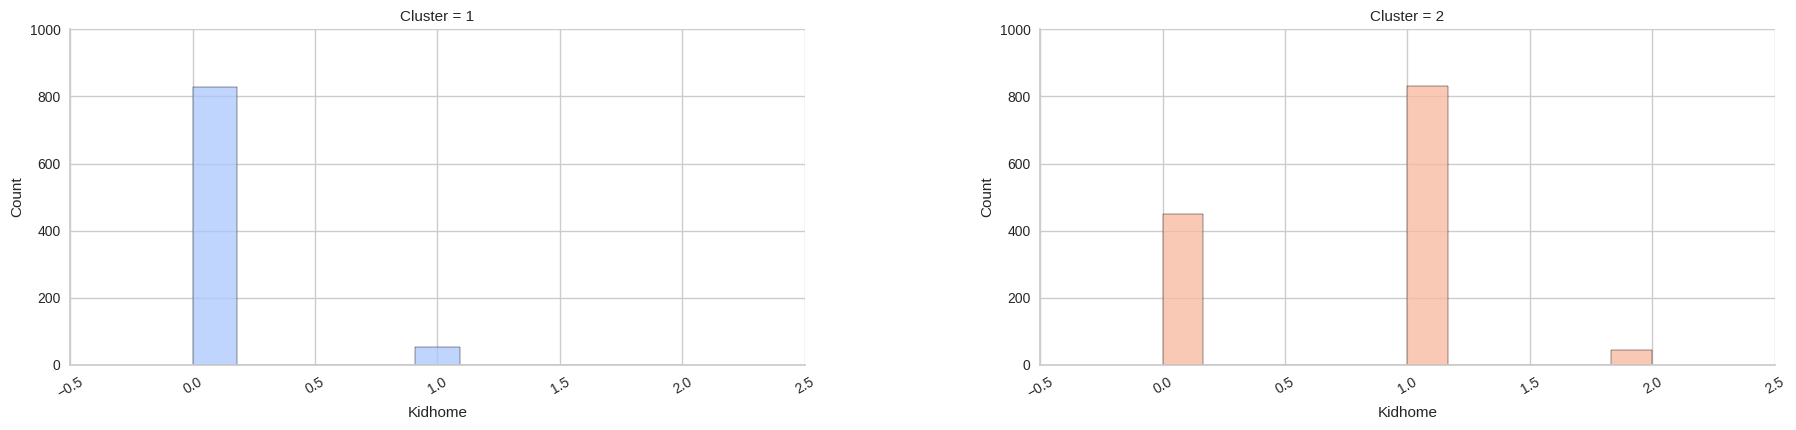

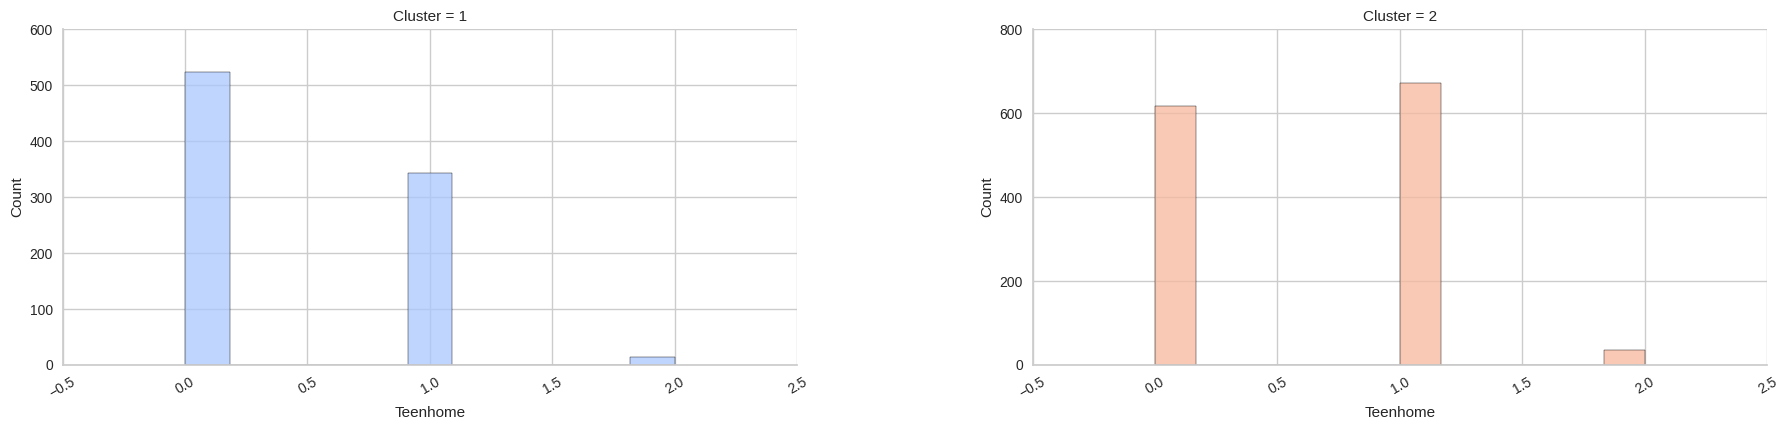

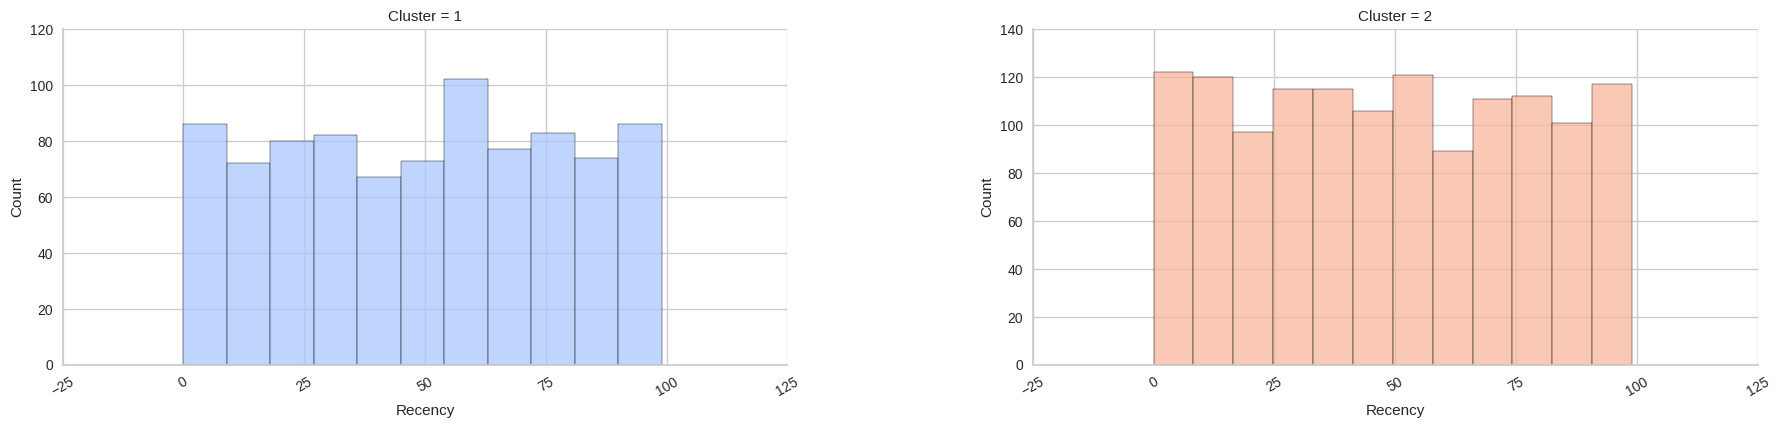

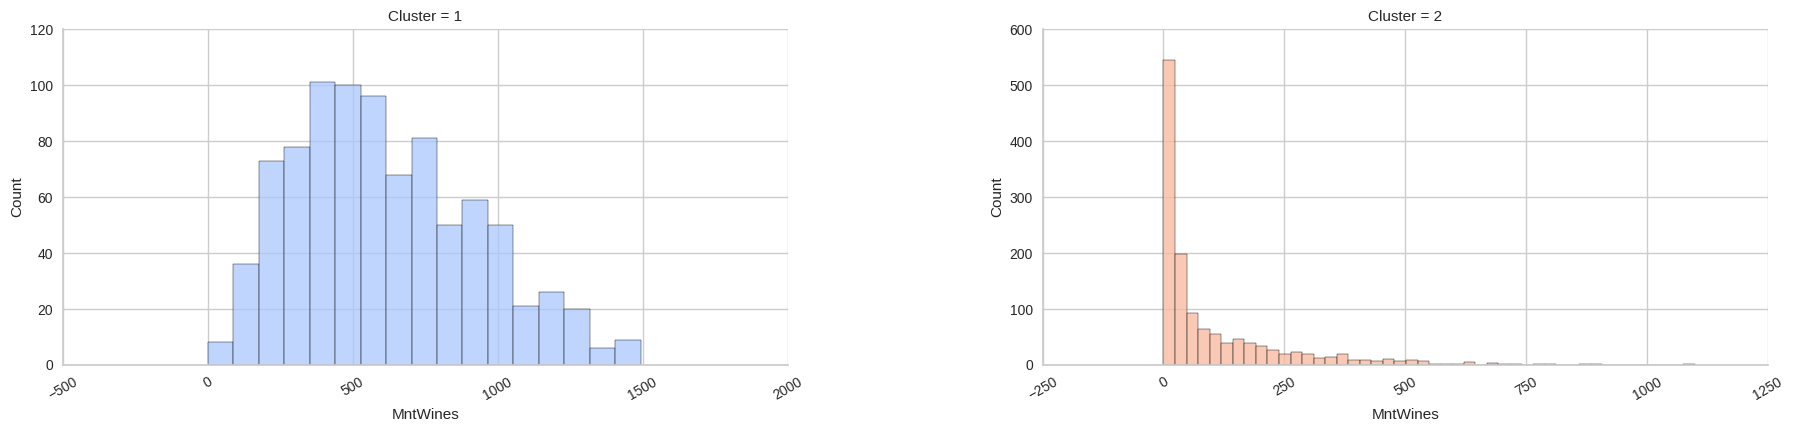

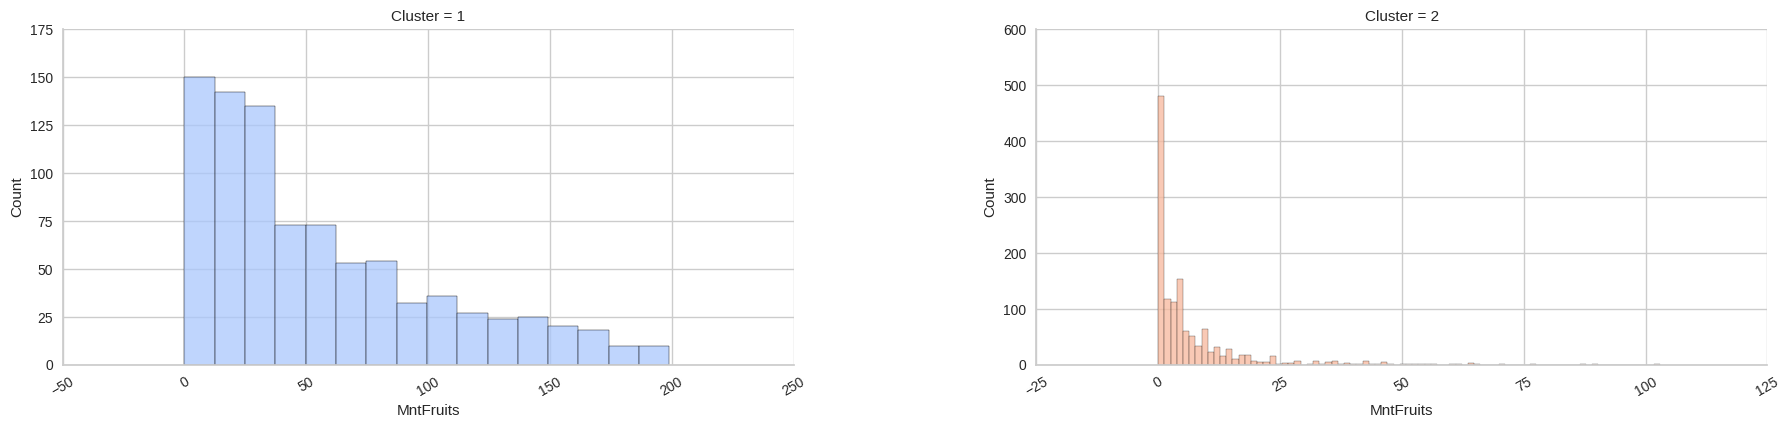

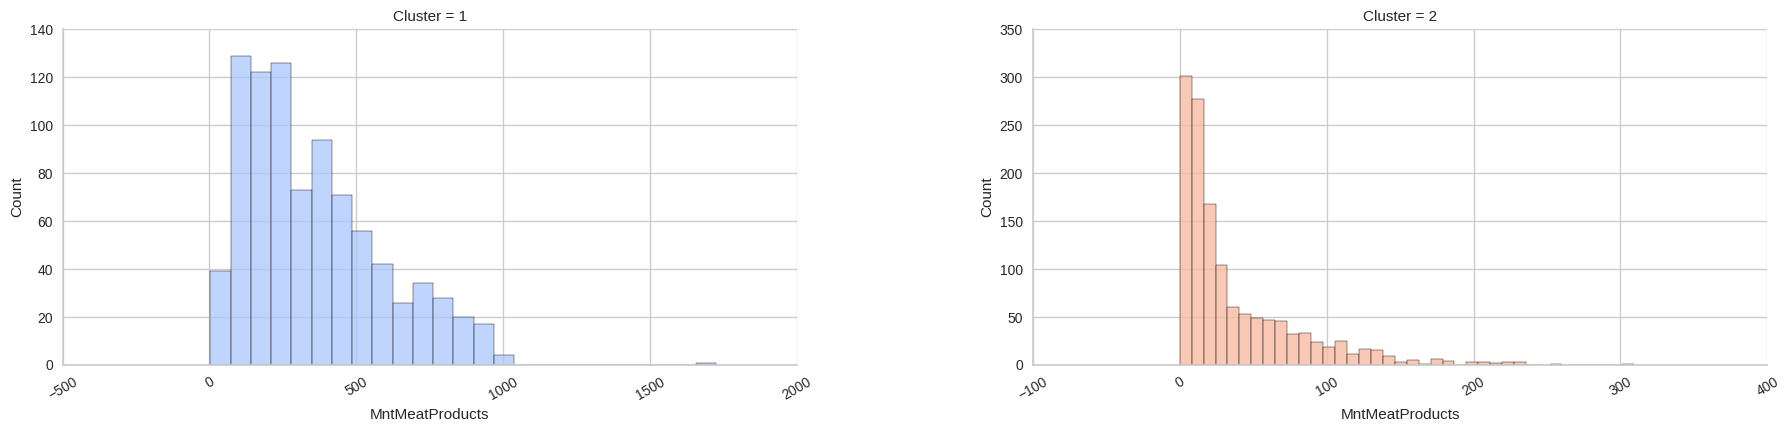

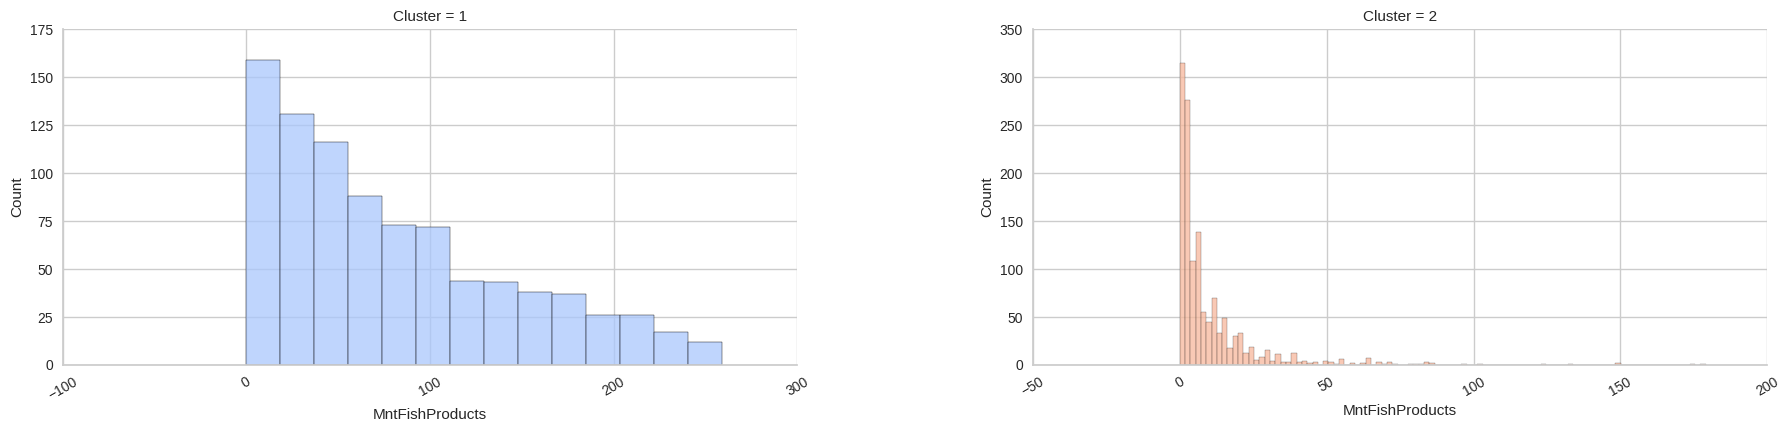

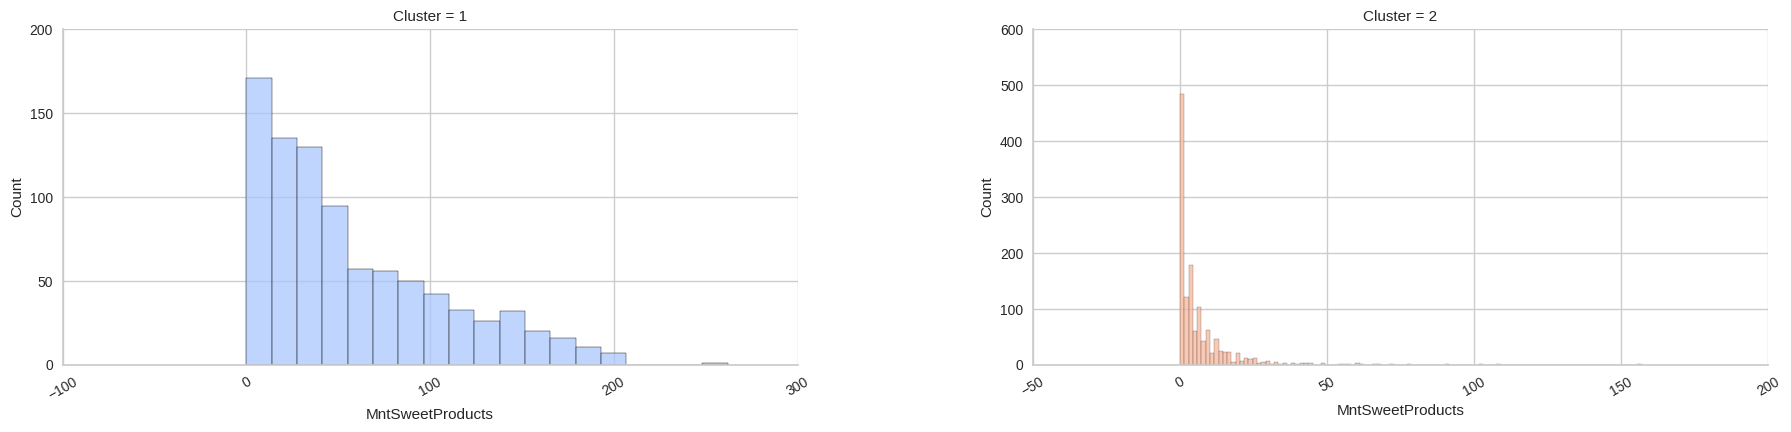

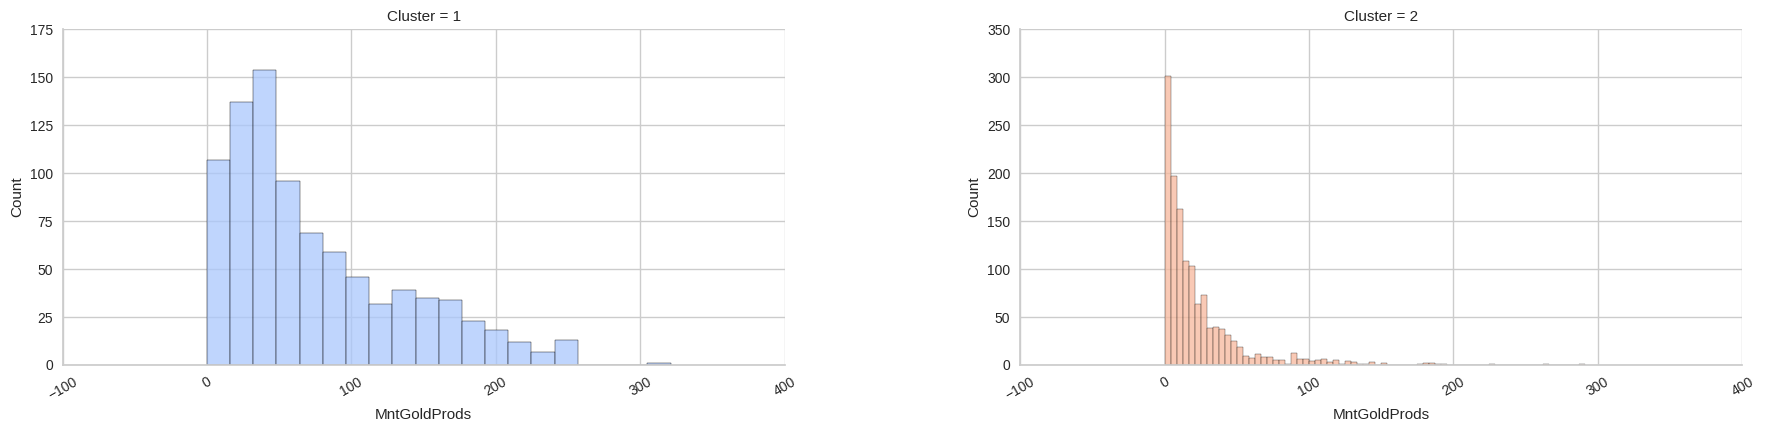

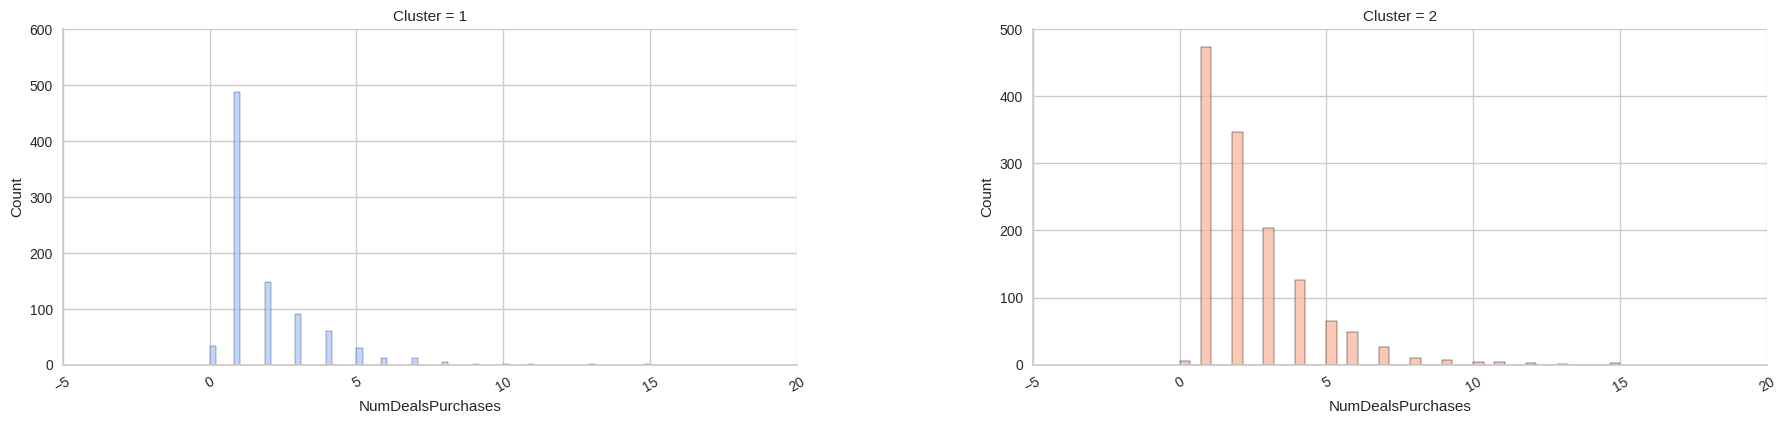

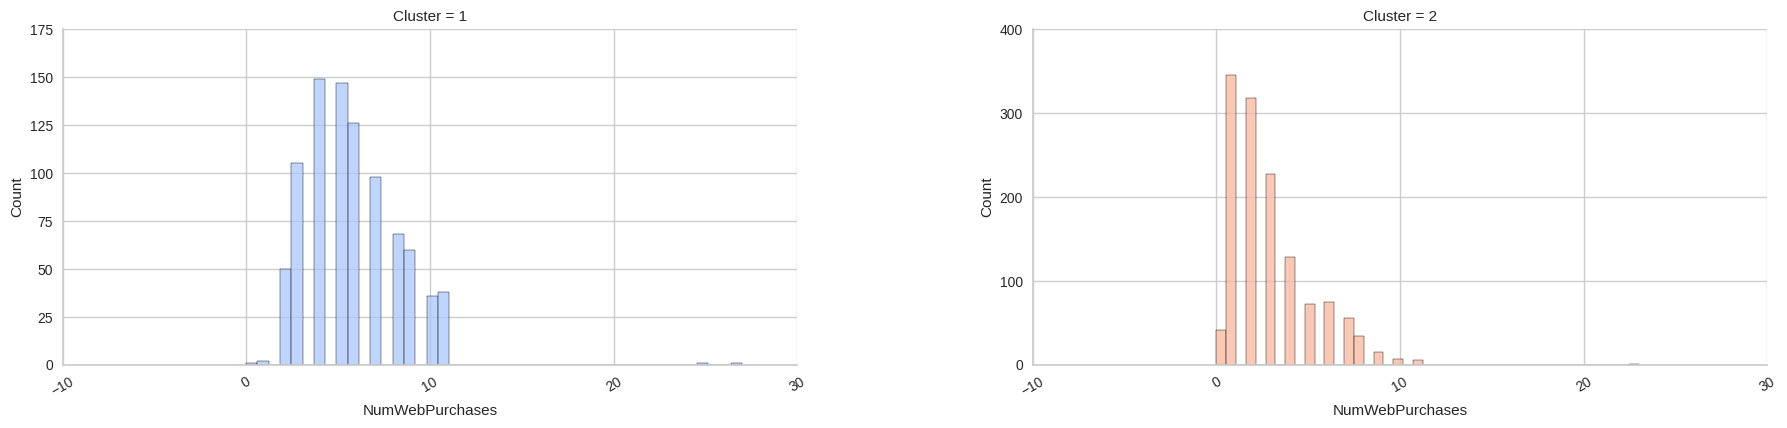

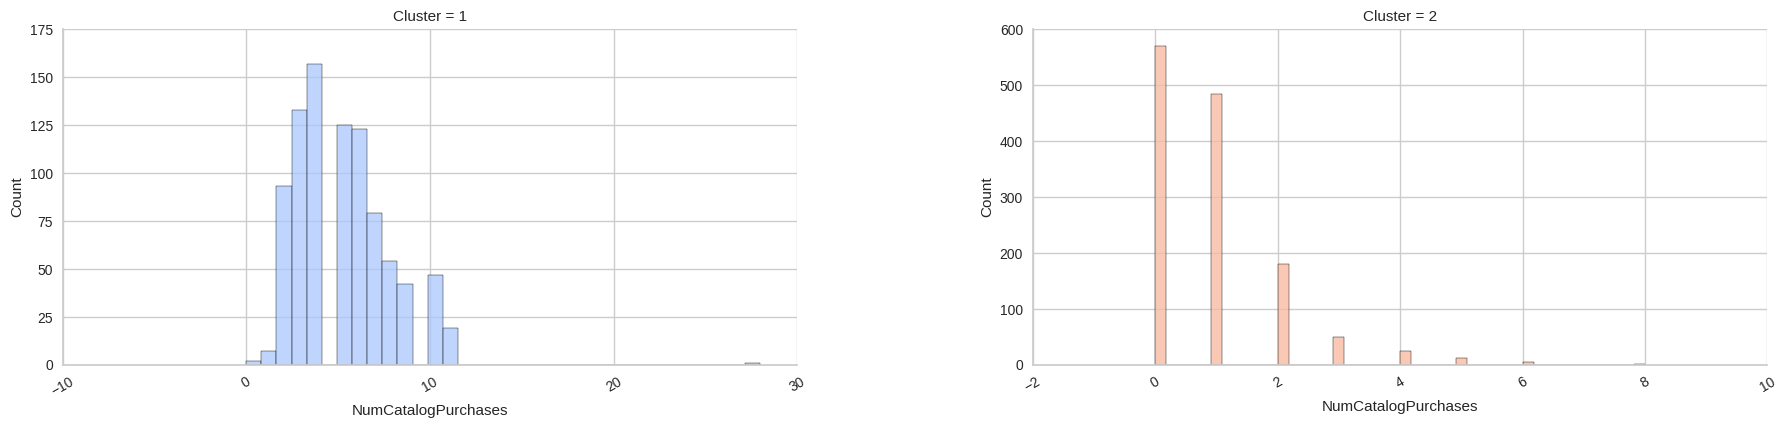

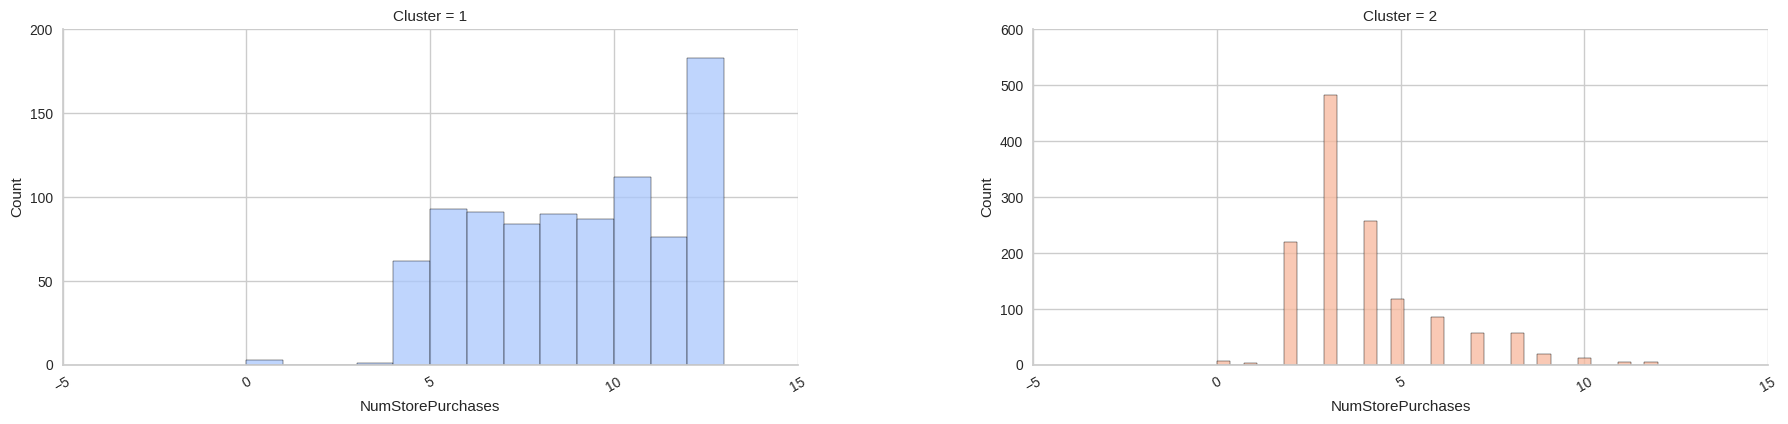

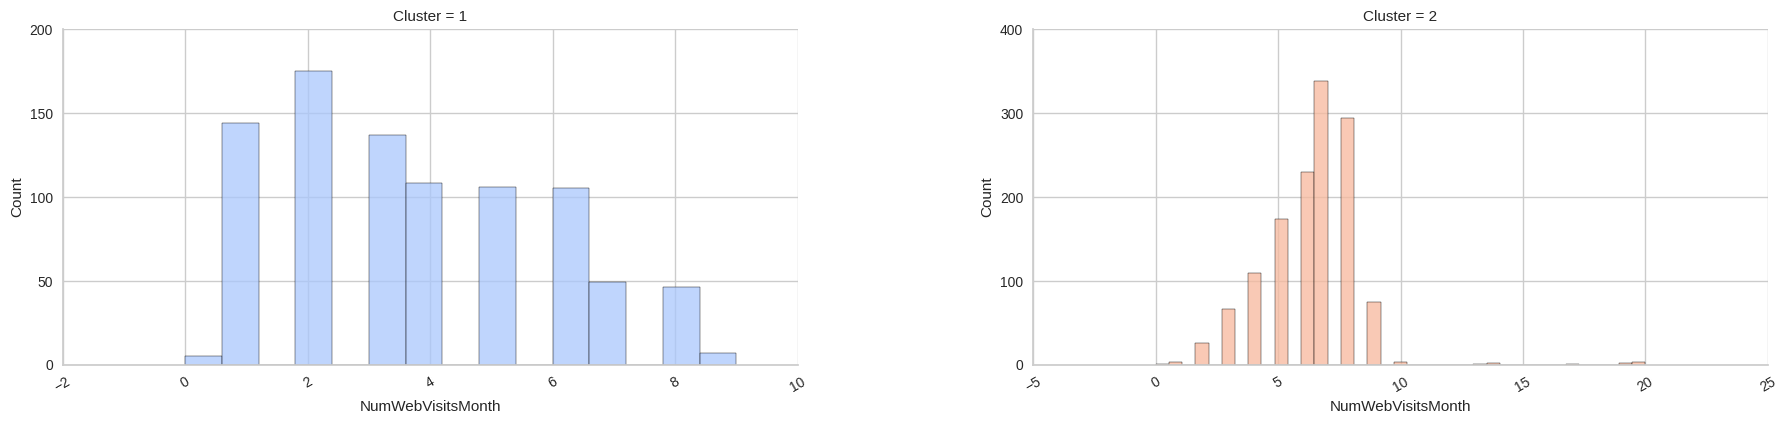

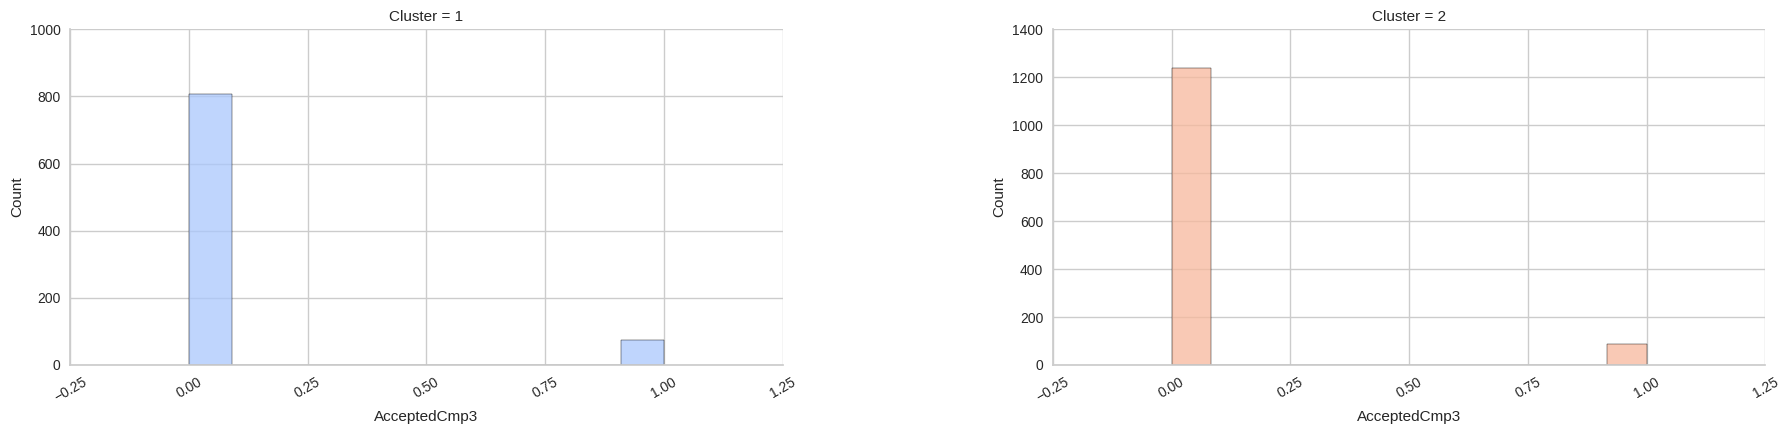

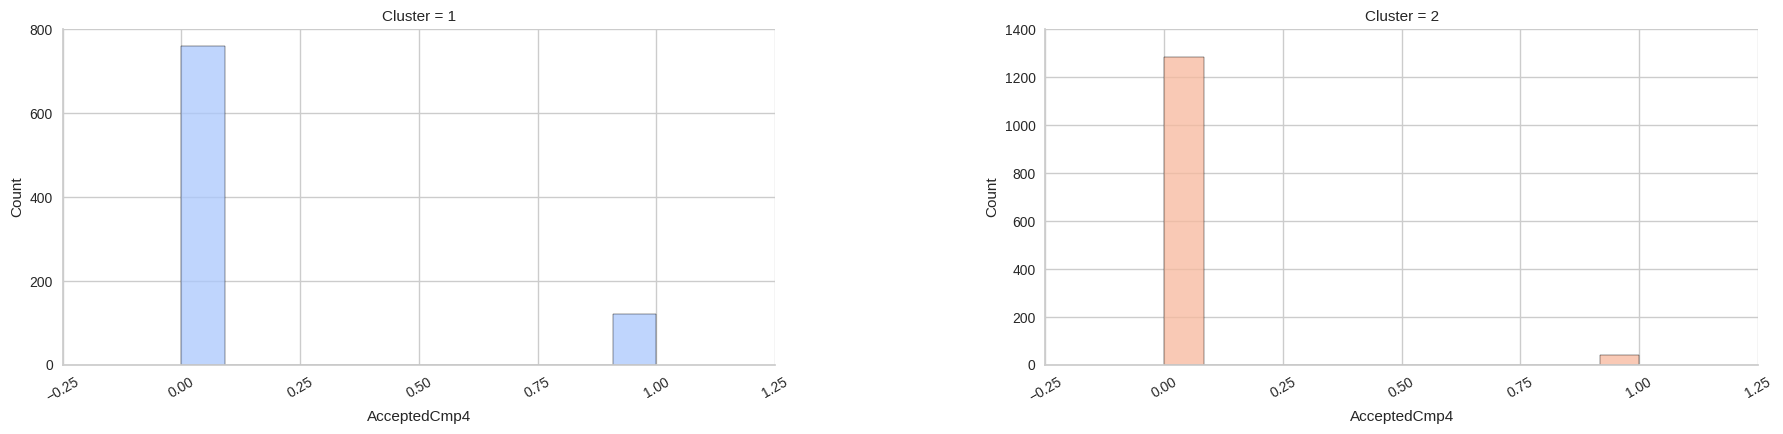

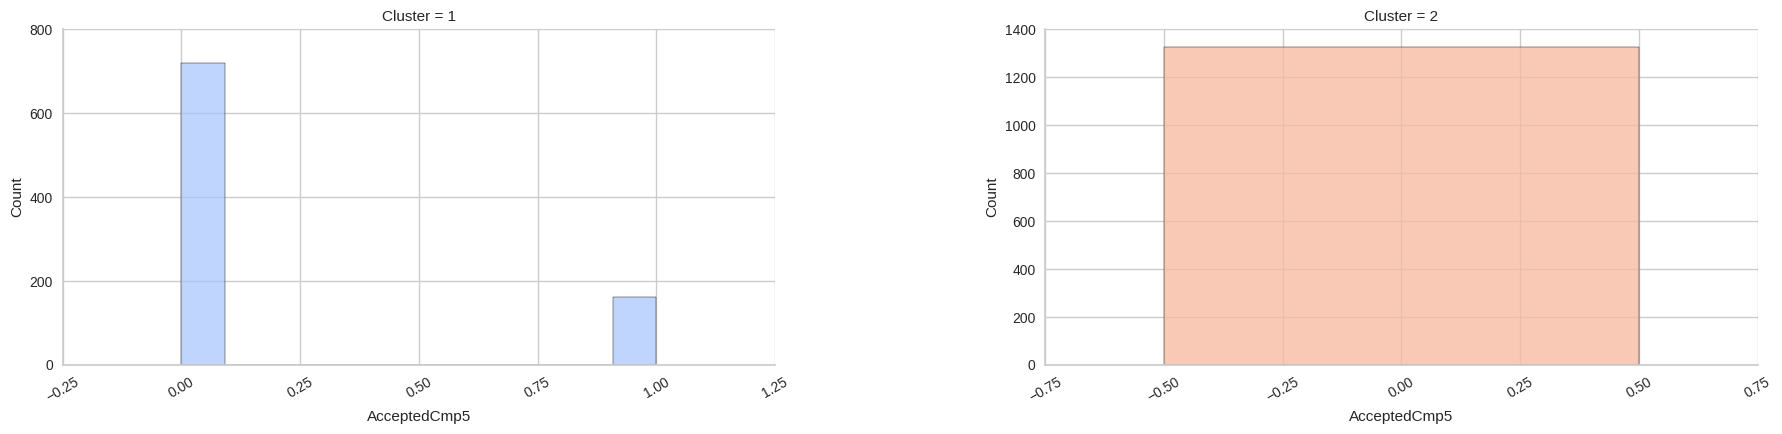

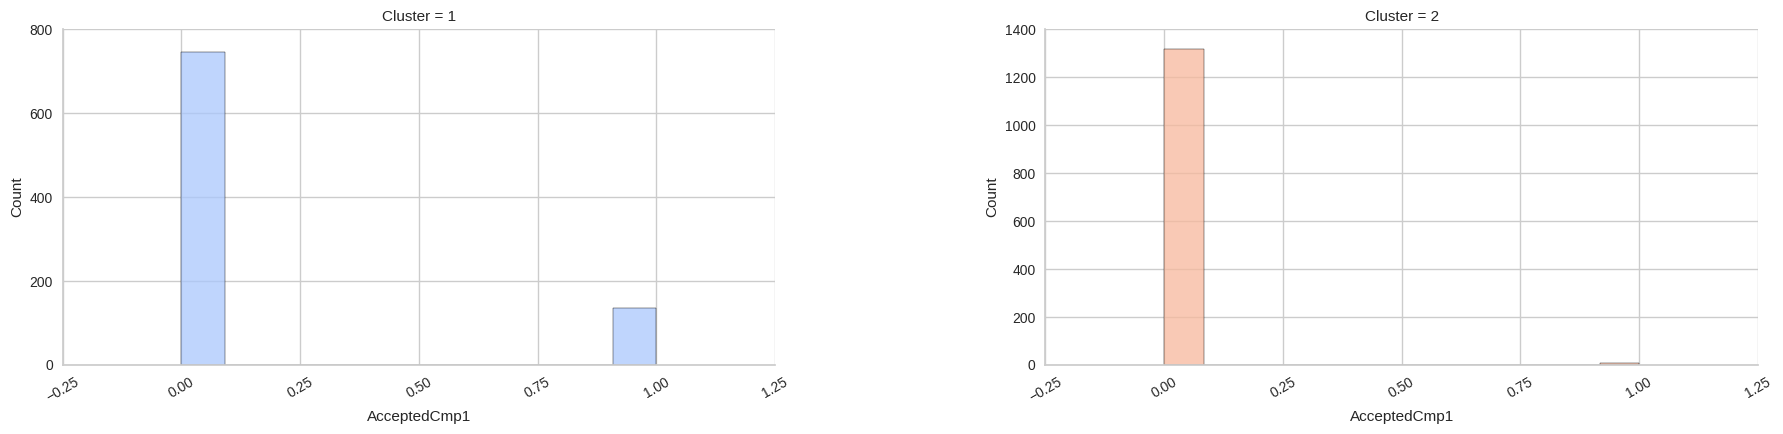

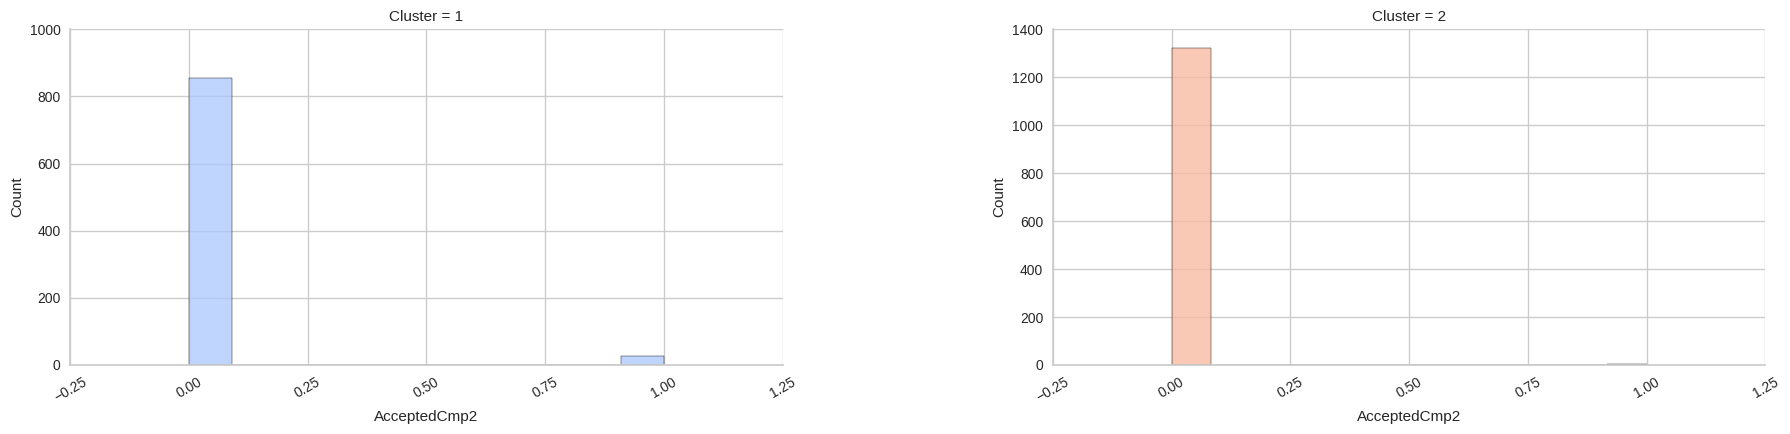

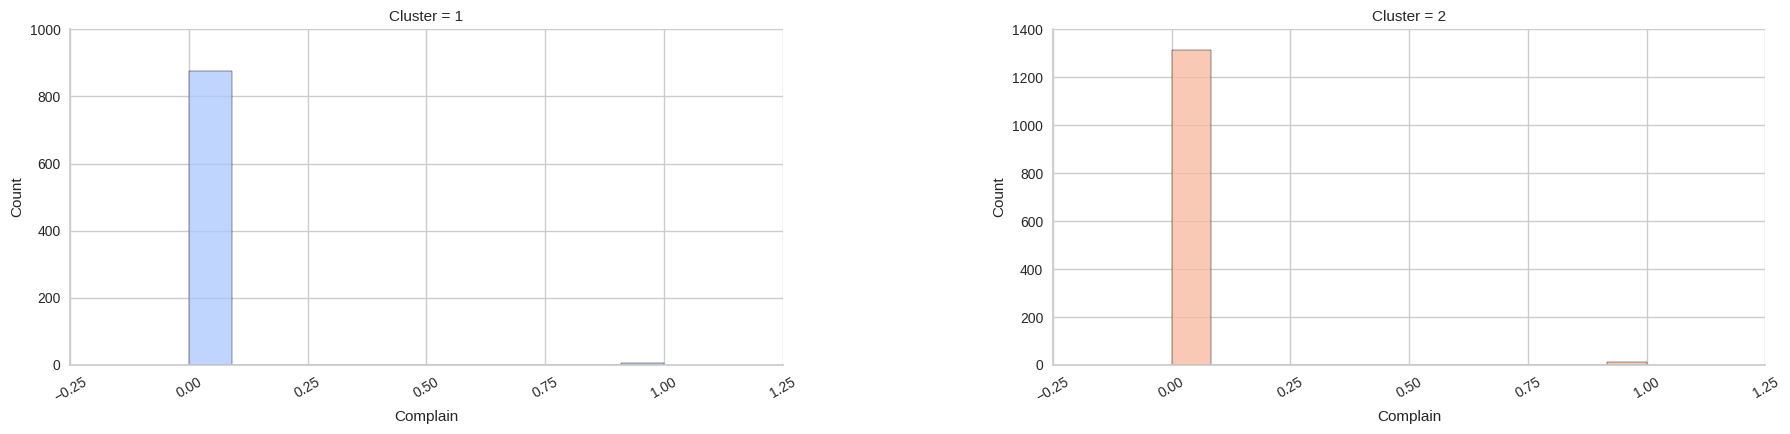

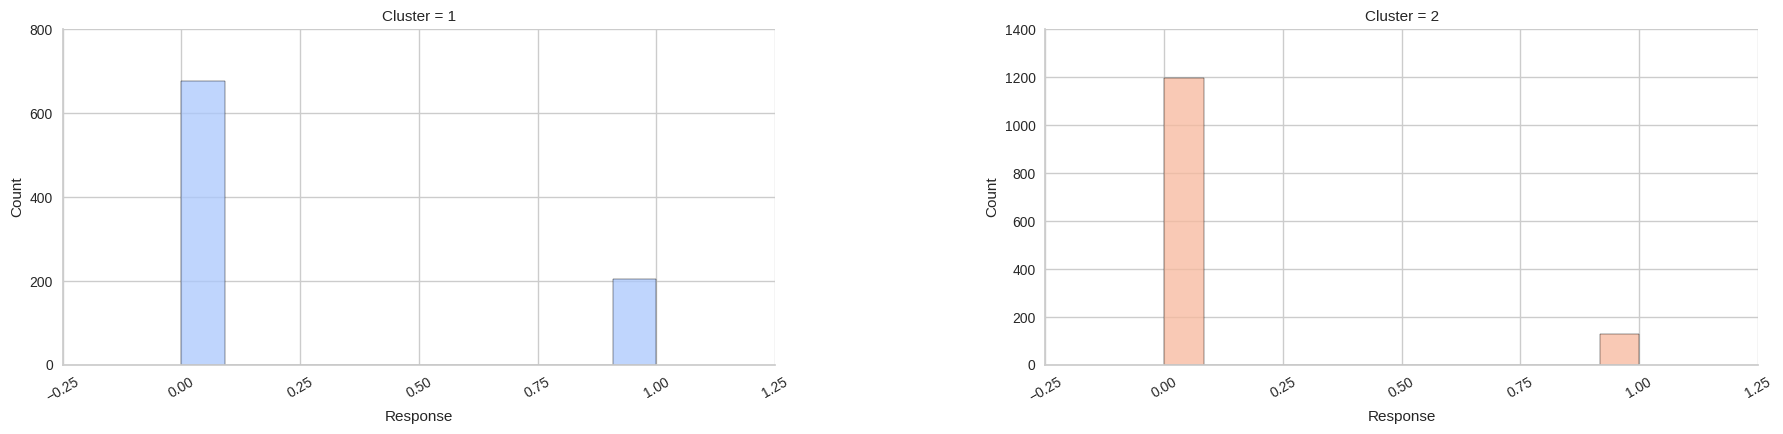

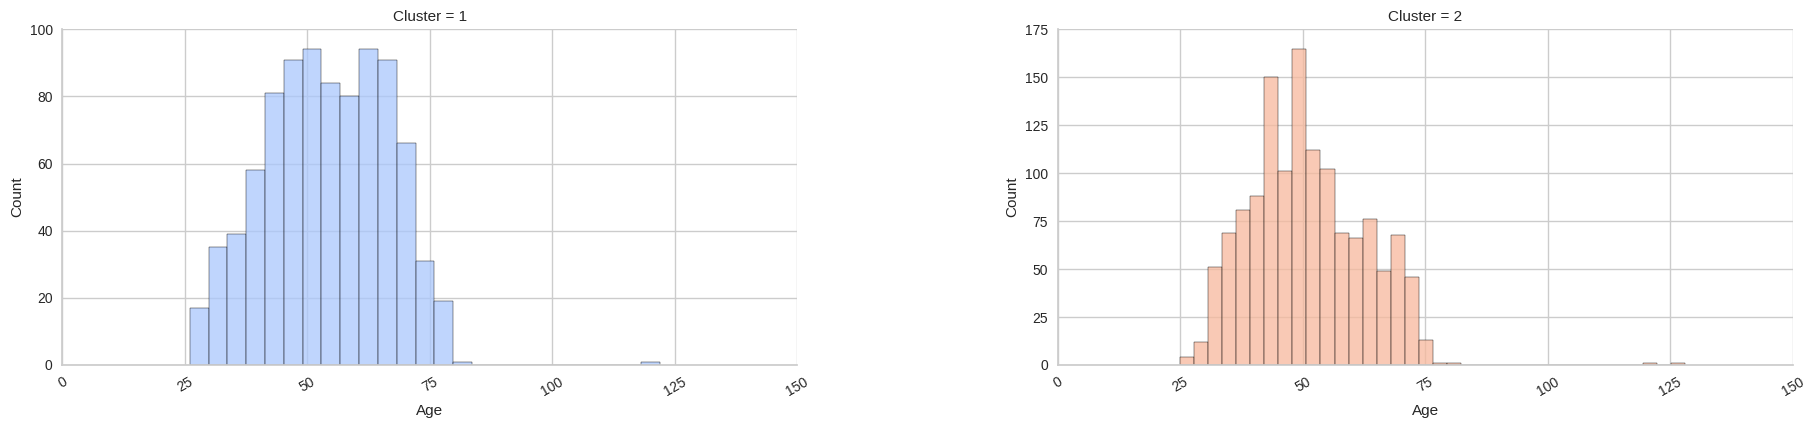

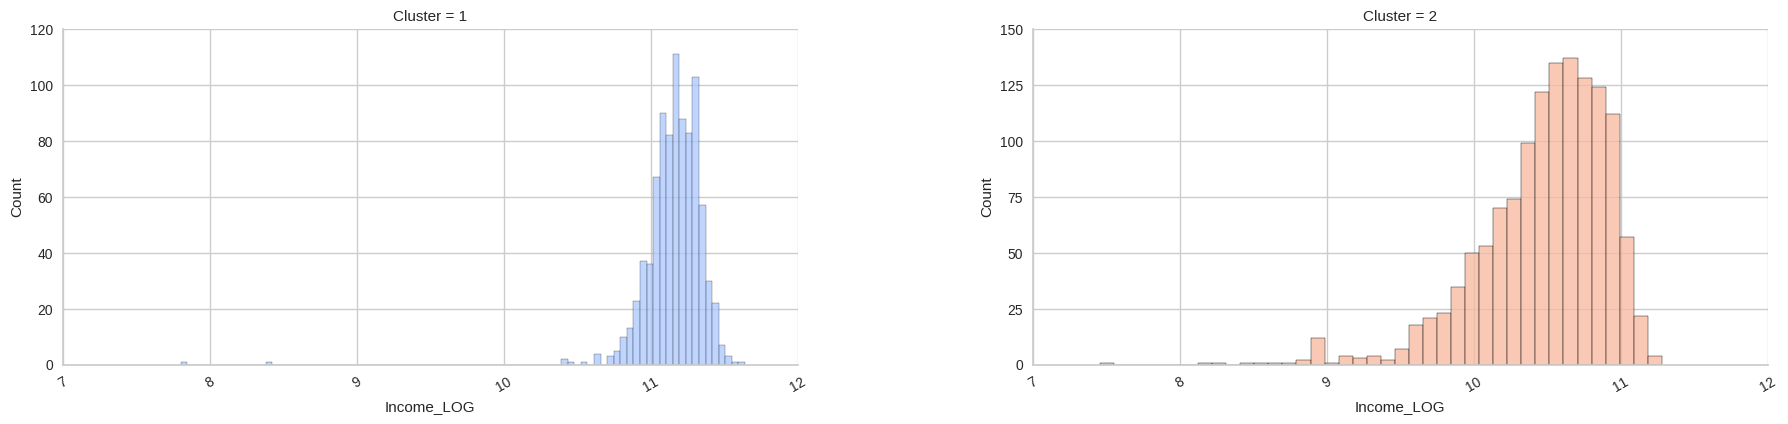

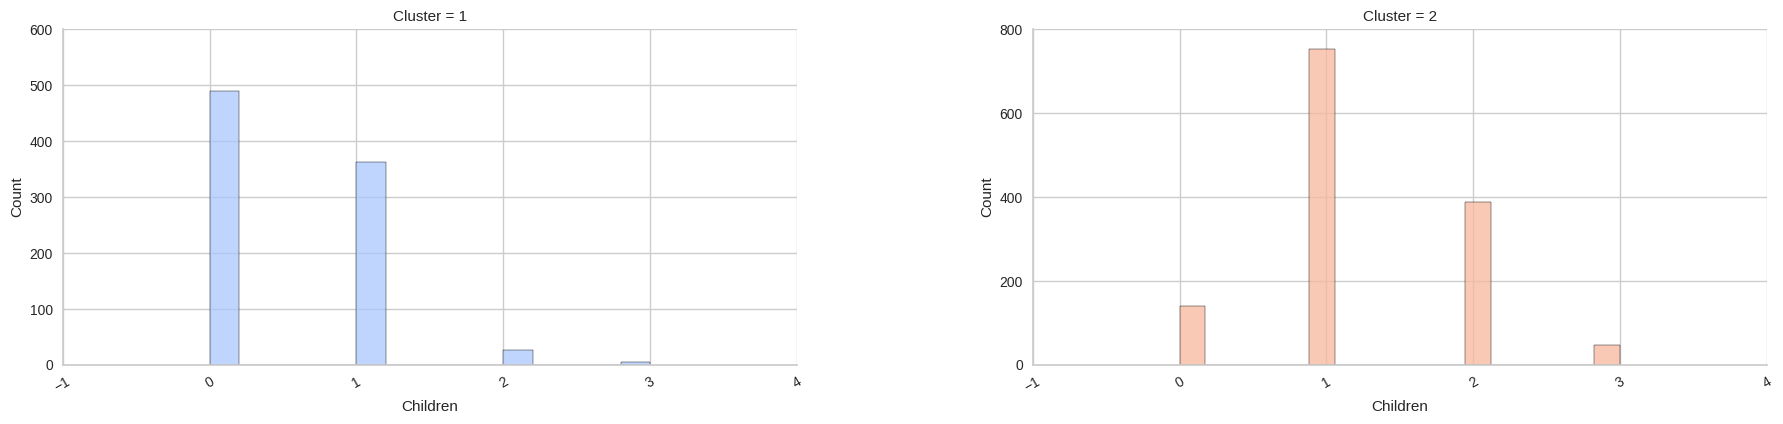

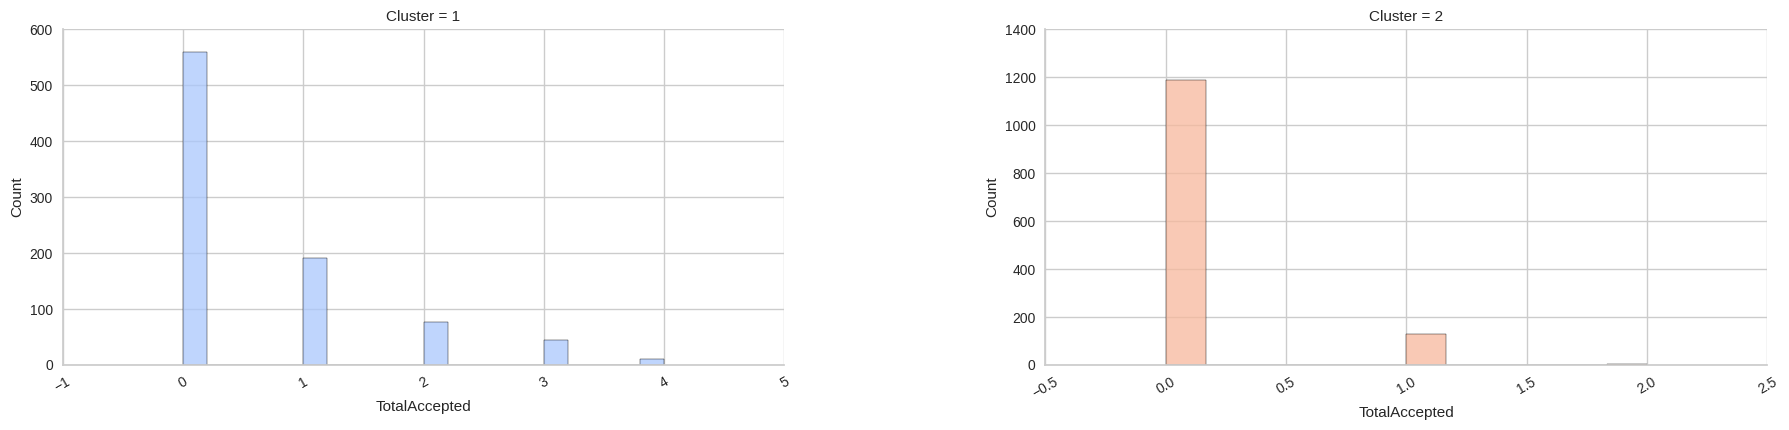

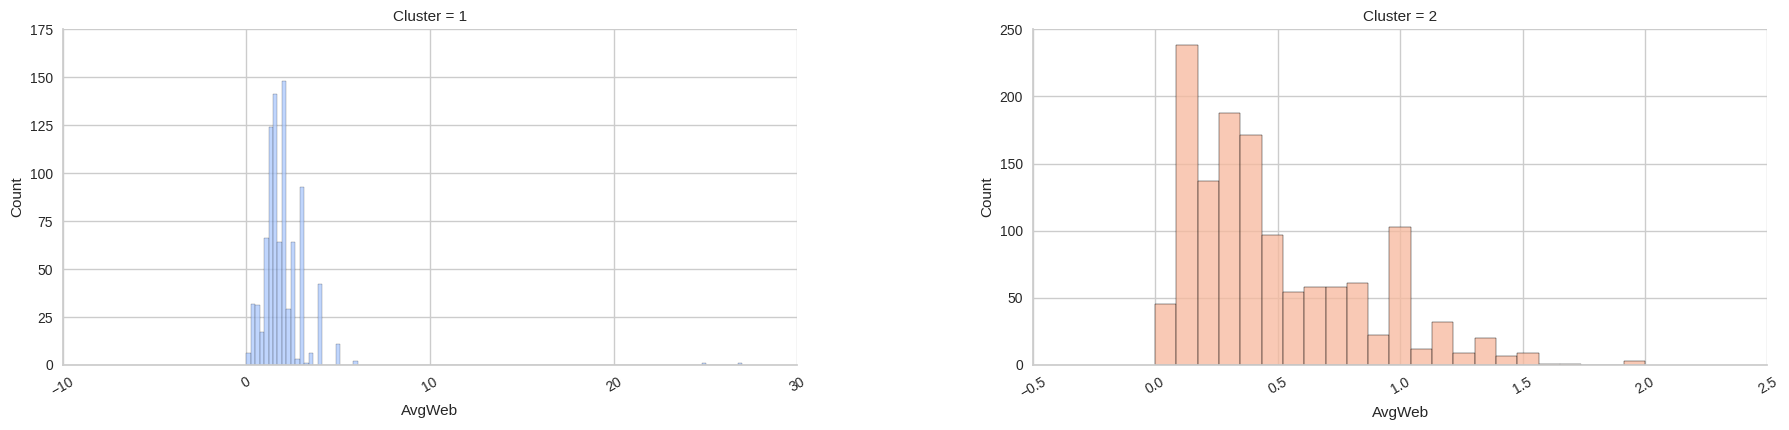

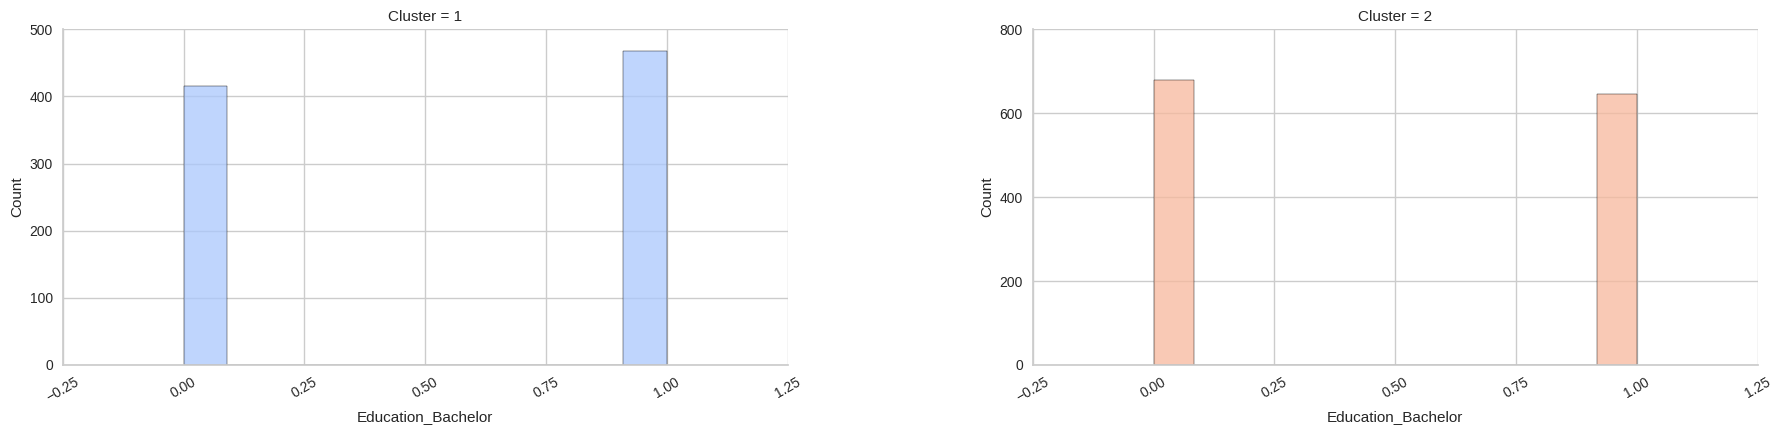

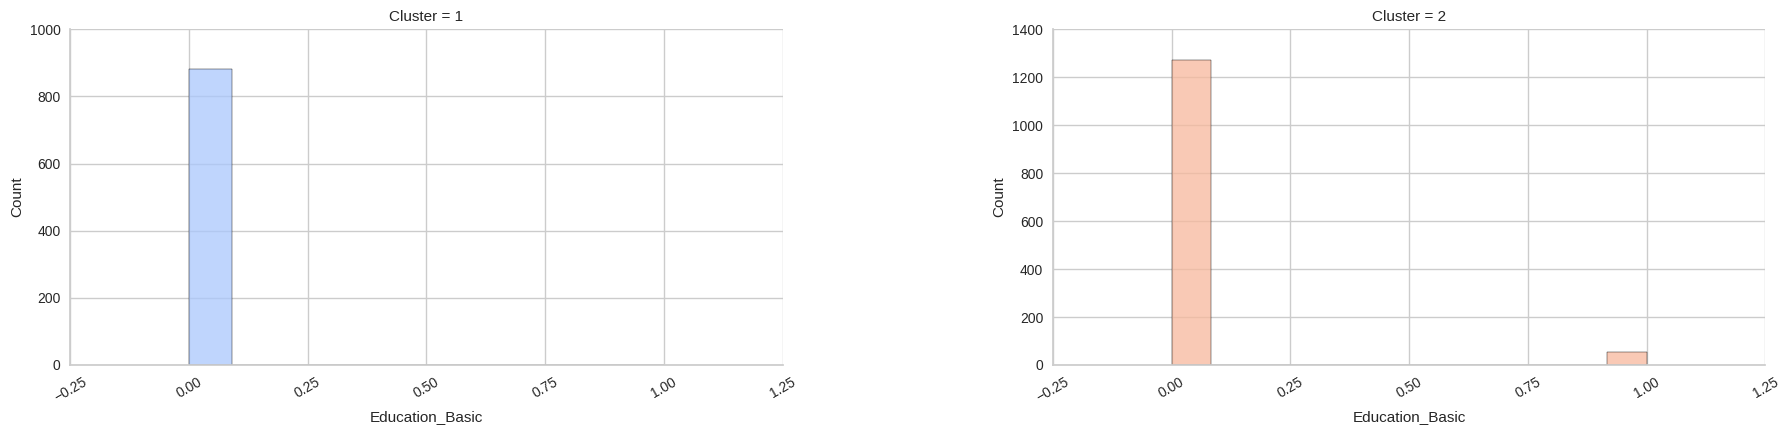

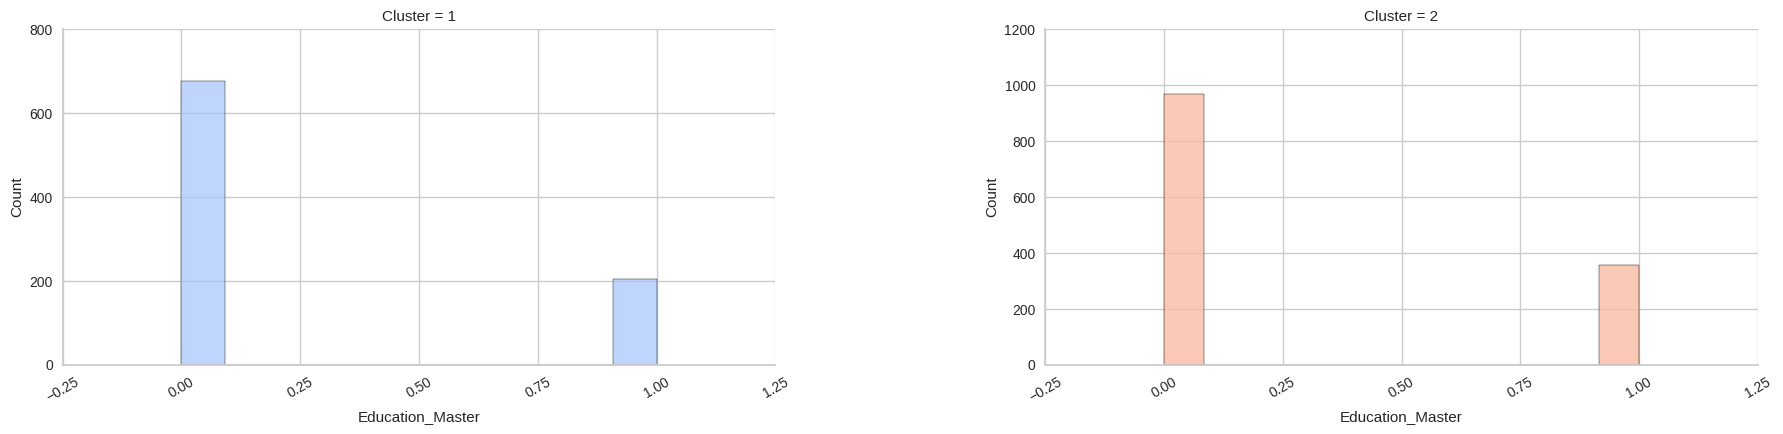

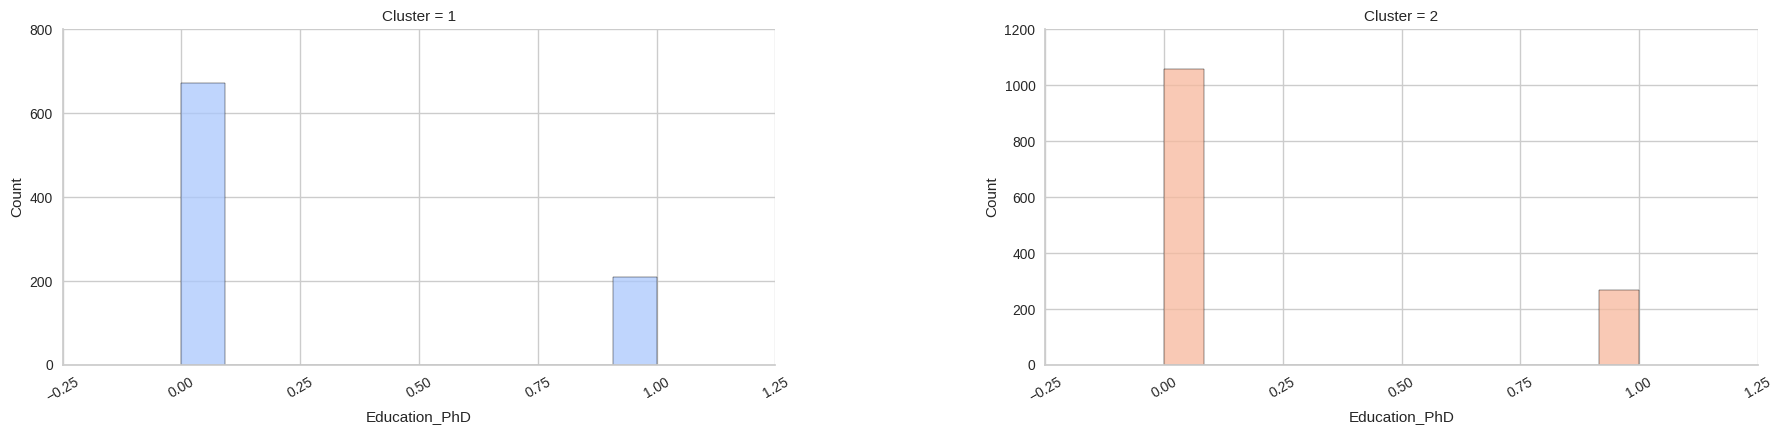

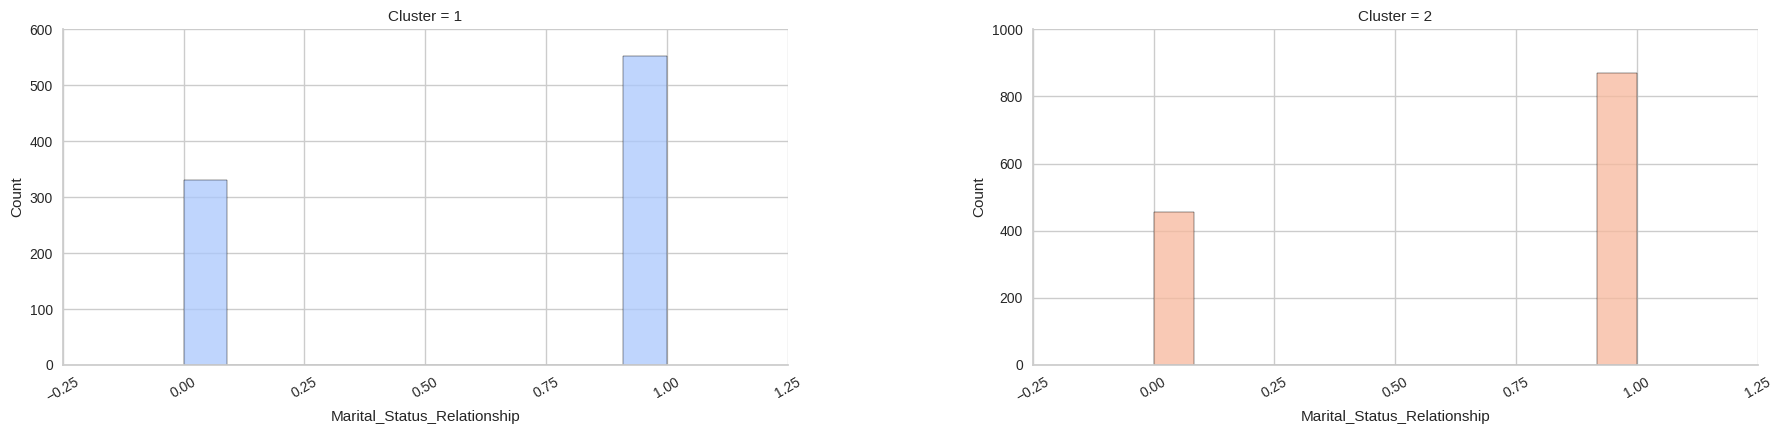

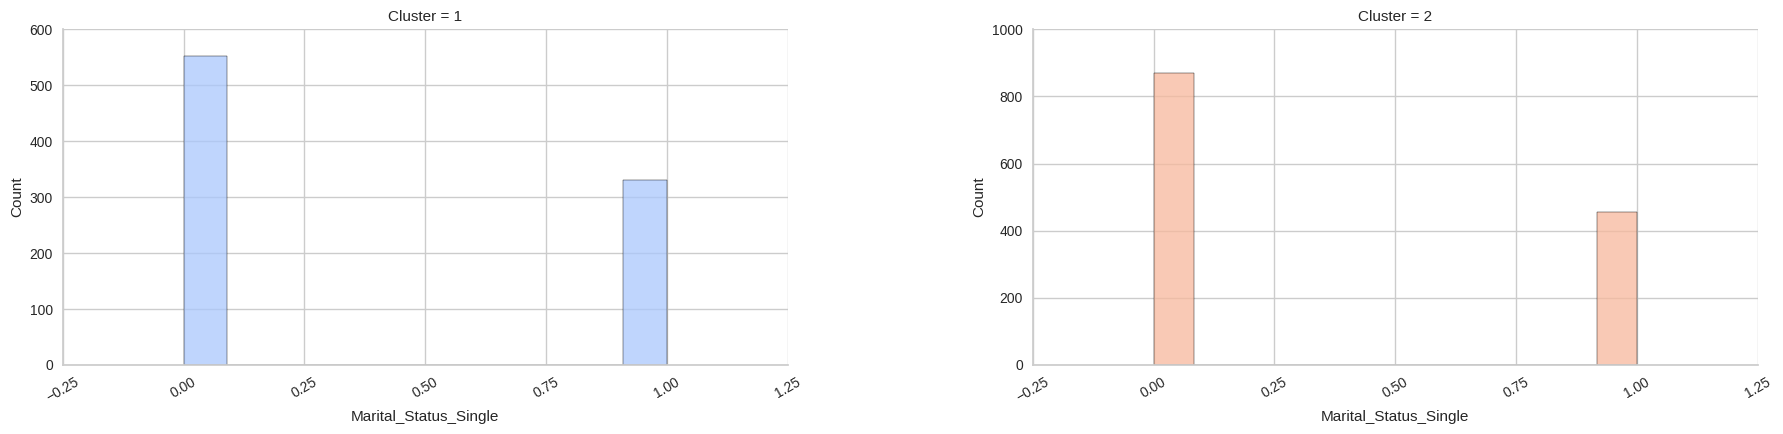

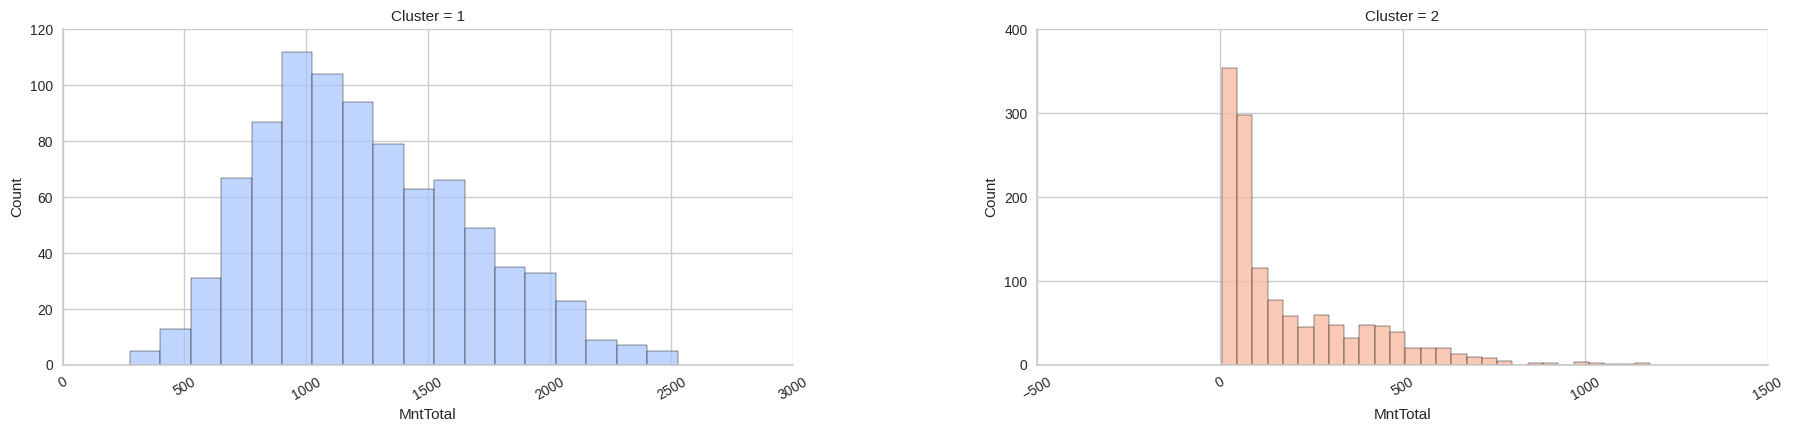

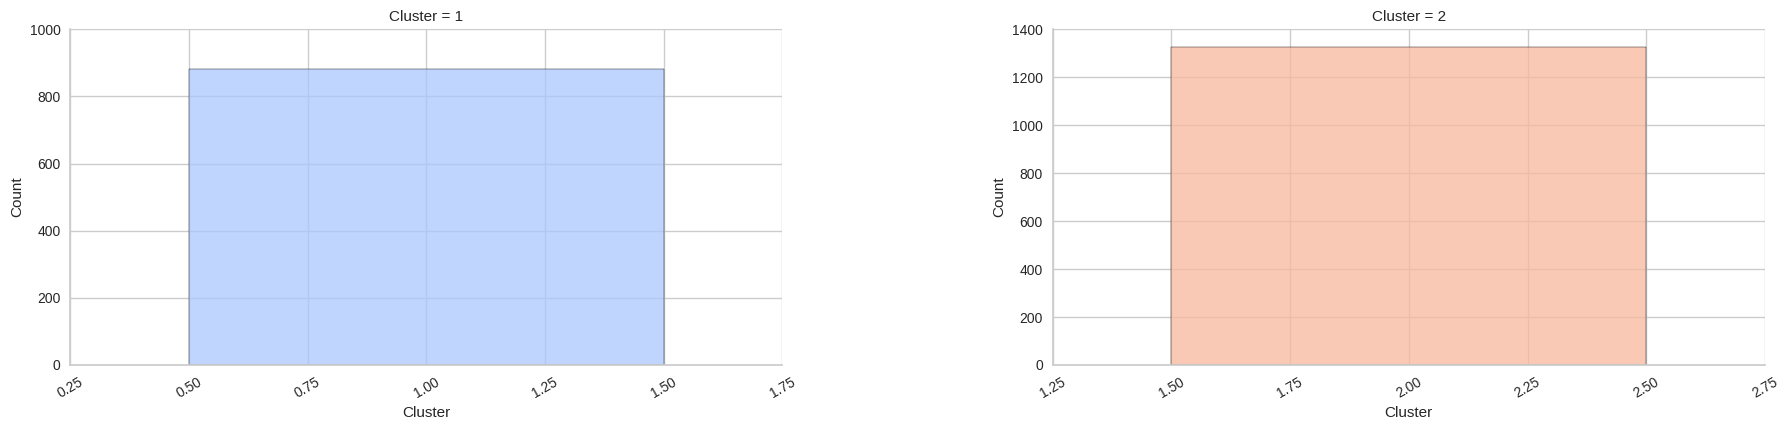

In [79]:
for i in df_1_1:
    g = sns.FacetGrid(df_1_1, col = "Cluster", hue = "Cluster", palette = "coolwarm", sharey=False, sharex=False)
    g.map(sns.histplot,i)

    g.set_xticklabels(rotation=30)
    g.set_yticklabels()
    g.fig.set_figheight(5)
    g.fig.set_figwidth(20)

**Observaciones:**

Se pueden observar tendencias signficativas para cada cluster.

1- En relacion al nivel de ingresos de los consumidores, se observa que en el cluster 1, los sujetos tienen ingresos mas altos que el cluster 2.

2- En relacion a la cantidad de hios, se puede ser que en el cluster 1 la mayoria no tienen hijos. Y los que si tienen, suelen tener 1. Los del cluster 2, la mayoria tienen 1 hijo. Hay algunos que tienen 2.

3- Se da una gran cantidad de consumo en la mayoria de los prouctos por parte de los sujetos del cluster 1. Estos a la vez, optan por hacerlo en un medio particular: tiendas fisicas. A la vez, se observa que el grupo 2, consume menos. Por ende, se podria volver a afirmar que los de este grupo cuentan con un poder adquisitivo menor.



#Modelo 2: clustering jerárquico aglomerativo

Es un método que agrupa datos basándose en la distancia entre ellos. Los elementos se organizan en una jerarquía de clústers con forma de árbol.

In [80]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Crear y entrenar el modelo de clustering jerárquico aglomerativo
ahc = AgglomerativeClustering(n_clusters=2, linkage='ward')
ahc.fit(df_1_1)

# Obtener las etiquetas de los clusters
labels_ahc = ahc.labels_

# Calcular el coeficiente de silueta para evaluar la calidad del clustering
silhouette_ahc = silhouette_score(df_modelo1, labels_ahc)

# Imprimir el coeficiente de silueta
print("Coeficiente de silueta para Clustering Jerárquico Aglomerativo:", silhouette_ahc)


Coeficiente de silueta para Clustering Jerárquico Aglomerativo: 0.31903971385177504


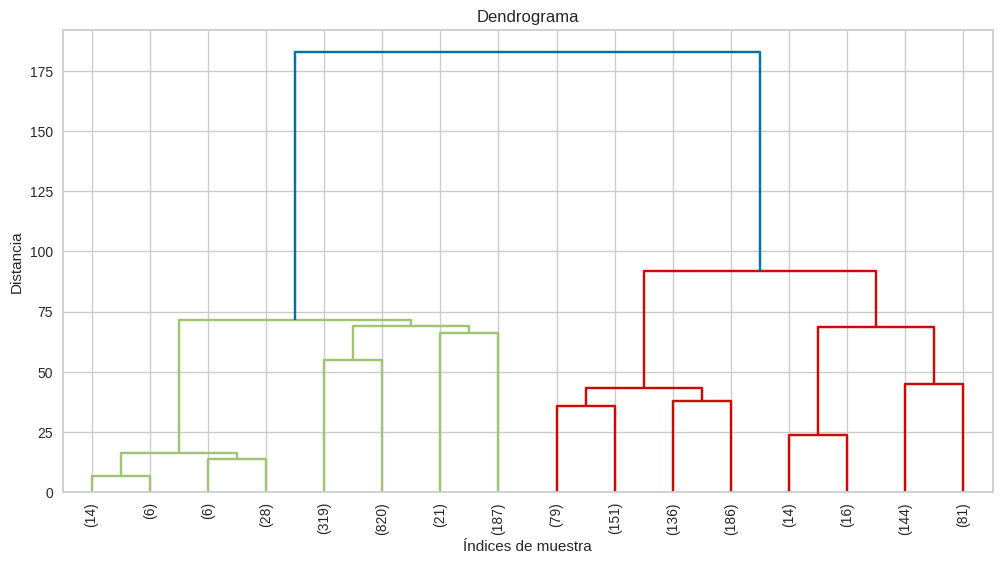

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Número de clusters: 2
Índice de silueta: 0.24


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Estandarize las variables (opcional pero recomendado)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_1_1)

# Calculo la matriz de enlace jerárquico
linkage_matrix = linkage(df_scaled, method='ward')

# Función para plotear el dendrograma con etiquetas más legibles
def plot_dendrogram(linkage_matrix, labels):
    plt.figure(figsize=(12, 6))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90, leaf_font_size=10, truncate_mode='level', p=3)
    plt.title("Dendrograma")
    plt.xlabel("Índices de muestra")
    plt.ylabel("Distancia")
    plt.show()

# Obtener etiquetas de las muestras
sample_labels = df_1_1.index.astype(str)

# Plotear el dendrograma mejorado
plot_dendrogram(linkage_matrix, sample_labels)

# el modelo de clustering jerárquico
n_clusters = 2  # Cambia esto según tu elección
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df_1_1['Cluster'] = agg_clustering.fit_predict(df_scaled)

# Calculo el índice de silueta
silhouette_avg = silhouette_score(df_scaled, df_1_1['Cluster'])

print(f"Número de clusters: {n_clusters}")
print(f"Índice de silueta: {silhouette_avg:.2f}")

#Comparando modelos

In [82]:
from sklearn.metrics import silhouette_score

# K-means
kmeans_silhouette = silhouette_score(cluster_data, pred)

# Clustering jerárquico
agg_silhouette = silhouette_score(df_scaled, df_1_1['Cluster'])

print(f"Coeficiente de Silueta (K-means): {kmeans_silhouette:.2f}")
print(f"Coeficiente de Silueta (Clustering jerárquico): {agg_silhouette:.2f}")

Coeficiente de Silueta (K-means): 0.23
Coeficiente de Silueta (Clustering jerárquico): 0.24


**Observaciones:**

Podemos observar que en ambos modelos, el coeficiente de silueta, una medida utilizada en el análisis de grupos (clustering) para evaluar la calidad de los clusters formados por diferentes algoritmos es muy similar. Esto sugiere que los objetos están relativamente bien emparejados con sus propios clusters y tienen una separación moderada con los clusters vecinos.
